In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import datetime
import re
import json
from datetime import datetime

In [2]:
        with open('ram_fincorp_output.json','r') as fl:

            jsonObj = json.load(fl)

        df_bc_fin = pd.json_normalize(jsonObj)

In [3]:
df_bc_fin.head()

report_id  leadID    dataFlag  fbs_v1  income_calculated  \
0  101493_0  101493  Data Found   821.0           22447.59   
1  102164_1  102164       Error     NaN                NaN   
2  102081_2  102081  Data Found   753.0           42120.62   
3   70872_3   70872       Error     NaN                NaN   
4   60352_4   60352  Data Found   778.0          174497.37   

   income_calculated_v2  obligation  overdebt_flag  dpd_risk_flag  \
0          22447.590000    37377.86            1.0            1.0   
1                   NaN         NaN            NaN            NaN   
2          42120.620000    48956.08            1.0            0.0   
3                   NaN         NaN            NaN            NaN   
4         393801.776633    45656.56            1.0            1.0   

  summary.bureau_name  ...  summary.cnt_bl_inquries_last_1m  \
0               CIBIL  ...                              0.0   
1                 NaN  ...                              NaN   
2               CIBIL  ...                              0.0   
3                 NaN  ...                              NaN   
4               CIBIL  ...                              0.0   

   summary.max_dpd_inlast6months  summary.enquiry_unsecured_last3months  \
0                           33.0                                   12.0   
1                            NaN                                    NaN   
2                            0.0                                   23.0   
3                            NaN                                    NaN   
4                          900.0                                    3.0   

   summary.max_dpd_cc_inlast12months  summary.max_dpd_cc_inlast6months  \
0                               33.0                              33.0   
1                                NaN                               NaN   
2                                NaN                               NaN   
3                                NaN                               NaN   
4                                0.0                               0.0   

   summary.max_dpd_cc_inlast3months  summary.max_dpd_non_cc_inlast12months  \
0                              33.0                                   29.0   
1                               NaN                                    NaN   
2                               NaN                                    0.0   
3                               NaN                                    NaN   
4                               0.0                                  900.0   

   summary.max_dpd_non_cc_inlast6months  summary.max_dpd_non_cc_inlast3months  \
0                                  29.0                                  29.0   
1                                   NaN                                   NaN   
2                                   0.0                                   0.0   
3                                   NaN                                   NaN   
4                                 900.0                                 900.0   

   summary  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 271 columns]

In [4]:
df_bc_fin.shape

(10140, 271)

In [5]:
df_bc_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Columns: 271 entries, report_id to summary
dtypes: float64(244), object(27)
memory usage: 21.0+ MB


In [6]:
df_bc_fin['dataFlag'].value_counts()

dataFlag
Data Found    8054
Error         2022
No Data         64
Name: count, dtype: int64

In [7]:
bc_fin = df_bc_fin[df_bc_fin['dataFlag'] == 'Data Found']

In [8]:
bc_fin.shape

(8054, 271)

In [9]:
pd.set_option('display.max_columns', None)
bc_fin.head(1)

report_id  leadID    dataFlag  fbs_v1  income_calculated  \
0  101493_0  101493  Data Found   821.0           22447.59   

   income_calculated_v2  obligation  overdebt_flag  dpd_risk_flag  \
0              22447.59    37377.86            1.0            1.0   

  summary.bureau_name  summary.amt_pos_unsecured_loans  \
0               CIBIL                         170782.0   

   summary.new_open_acc_last30days  \
0                              0.0   

   summary.max_loan_amount_serviced_last2year  \
0                                     50100.0   

   summary.max_loan_amount_serviced_last6months  \
0                                       50100.0   

   summary.settlement_writtenoff  summary.settlement_writtenoff_last12months  \
0                            0.0                                         0.0   

   summary.total_writtenoff_amt  summary.amts_writtenoff_last24months  \
0                           0.0                                   0.0   

   summary.max_credit_card_limit_last2year  \
0                                  64765.0   

   summary.max_emi_serviced_last2year  summary.max_overdue  \
0                            16649.46              10641.0   

   summary.sum_active_overdue_amount  \
0                            16475.0   

   summary.new_open_acc_gt_1lac_non_cc_last60days  \
0                                             0.0   

   summary.new_open_acc_lte_1lac_non_cc_last60days  \
0                                              1.0   

   summary.new_open_acc_non_cc_last60days  summary.sum_tradelines_balance  \
0                                     1.0                        318042.0   

   summary.total_outstanding_amount  summary.total_sanctioned_amount_cc  \
0                          170782.0                             35263.0   

   summary.total_outstanding_amount_cc  summary.total_sanctioned_amount_od  \
0                              35263.0                                 0.0   

   summary.total_outstanding_amount_od  \
0                                  0.0   

   summary.total_sanctioned_amount_active_pl_bl  \
0                                      154815.0   

   summary.total_outstanding_amount_active_pl_bl  \
0                                       130121.0   

   summary.total_outstanding_amount_non_cc_cd_gl  \
0                                       130121.0   

   summary.total_sanctioned_active_amount_non_cc_cd_gl  \
0                                           154815.0     

   summary.total_outstanding_amount_active_non_cc_cd_gl  \
0                                           130121.0      

   summary.total_sanctioned_amount_non_hl_al_cc_cd_gl  \
0                                           196422.0    

   summary.total_outstanding_amount_non_hl_al_cc_cd_gl  \
0                                           130121.0     

   summary.tradeline_max_balance  summary.tradeline_max_balance_24months  \
0                        64765.0                                 50100.0   

   summary.sanction_active_pl_cd_loan  \
0                            176407.0   

   summary.settlement_writtenoff_last24months  \
0                                         0.0   

   summary.settlement_writtenoff_individual_joint_24months  \
0                                                0.0         

   summary.settlement_writtenoff_non_cc_individual_joint_12months  \
0                                                0.0                

   summary.settlement_writtenoff_non_cc_individual_joint_18months  \
0                                                0.0                

   summary.settlement_writtenoff_non_cc_individual_joint_24months  \
0                                                0.0                

   summary.last3months_pymt_max_dpd  summary.max_dpd_last_6_mo  \
0                              33.0                       33.0   

   summary.max_dpd_inlast12months  summary.max_dpd_inlast24months  \
0                            33.0                            33.0   

   summary.max_dpd_inlast36months  summar

In [10]:
# Read JSON file into DataFrame
rest_cibil = pd.read_json('cibil_json.json')

In [11]:
rest_cibil.shape

(3602, 2)

In [12]:
rest_cibil.head()

leadID                                       api_response
0   99101                                               null
1   59898                                               null
2   89318                                               null
3  101493   {"is_success":true,"apimsg":{"controlData":{"...
4  102164   {"is_success":true,"apimsg":{"controlData":{"...

In [13]:

# Convert 'leadId' column to integer type for both dataframes
rest_cibil['leadID'] = rest_cibil['leadID'].astype(int)
bc_fin['leadID'] = bc_fin['leadID'].astype(int)

# Merge the two dataframes on the 'leadId' column
#merged_df = all_detail.merge(df1, on="leadID")


json_extr= rest_cibil.merge(bc_fin, on='leadID')

C:\Users\HP\AppData\Local\Temp\ipykernel_9140\3825927674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_fin['leadID'] = bc_fin['leadID'].astype(int)


In [14]:
json_extr.head()

leadID                                       api_response  report_id  \
0  101493   {"is_success":true,"apimsg":{"controlData":{"...   101493_0   
1  102081   {"is_success":true,"apimsg":{"controlData":{"...   102081_2   
2   60352   {"is_success":true,"apimsg":{"controlData":{"...    60352_4   
3  104358   {"is_success":true,"apimsg":{"controlData":{"...  104358_11   
4  104358   {"is_success":true,"apimsg":{"controlData":{"...  104358_11   

     dataFlag  fbs_v1  income_calculated  income_calculated_v2  obligation  \
0  Data Found   821.0           22447.59          22447.590000    37377.86   
1  Data Found   753.0           42120.62          42120.620000    48956.08   
2  Data Found   778.0          174497.37         393801.776633    45656.56   
3  Data Found   764.0            4460.34          11380.569310     8457.45   
4  Data Found   764.0            4460.34          11380.569310     8457.45   

   overdebt_flag  dpd_risk_flag summary.bureau_name  \
0            1.0            1.0               CIBIL   
1            1.0            0.0               CIBIL   
2            1.0            1.0               CIBIL   
3            1.0            1.0               CIBIL   
4            1.0            1.0               CIBIL   

   summary.amt_pos_unsecured_loans  summary.new_open_acc_last30days  \
0                         170782.0                              0.0   
1                         142353.0                              1.0   
2                         985919.0                              0.0   
3                          58512.0                              0.0   
4                          58512.0                              0.0   

   summary.max_loan_amount_serviced_last2year  \
0                                     50100.0   
1                                    100000.0   
2                                    161243.0   
3                                      6500.0   
4                                      6500.0   

   summary.max_loan_amount_serviced_last6months  \
0                                       50100.0   
1                                      100000.0   
2                                      161243.0   
3                                        4750.0   
4                                        4750.0   

   summary.settlement_writtenoff  summary.settlement_writtenoff_last12months  \
0                            0.0                                         0.0   
1                            0.0                                         0.0   
2                           14.0                                         8.0   
3                            0.0                                         0.0   
4                            0.0                                         0.0   

   summary.total_writtenoff_amt  summary.amts_writtenoff_last24months  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                      245333.0                              245333.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   

   summary.max_credit_card_limit_last2year  \
0                                  64765.0   
1                                      NaN   
2                                  44500.0   
3                                  52396.0   
4                                  52396.0   

   summary.max_emi_serviced_last2year  summary.max_overdue  \
0                        16649.460000              10641.0   
1                         9167.999291                  NaN   
2                        25563.895782             378820.0   
3                         6597.500000               8271.0   
4                         6597.500000               8271.0   

   summary.sum_active_overdue_amount  \
0                            16475.0   
1                                0.0   
2                          107401

In [15]:
json_extr.shape

(3056, 272)

In [16]:
# Drop duplicates based on column 'A'
json_extr = json_extr.drop_duplicates(subset=['leadID'])

In [17]:
json_extr.shape

(2761, 272)

In [18]:
rev_eng= json_extr.sample(8)

In [19]:
rev_eng.to_csv('sample_to_build_feature.csv',index= False)

In [20]:
rev_eng = pd.read_csv('sample_to_build_feature.csv')

In [21]:
rev_eng.head()

leadID                                       api_response    report_id  \
0  131130   {"is_success":true,"apimsg":{"controlData":{"...  131130_2643   
1  128573   {"is_success":true,"apimsg":{"controlData":{"...  128573_2733   
2  113026   {"is_success":true,"apimsg":{"controlData":{"...   113026_560   
3  120480   {"is_success":true,"apimsg":{"controlData":{"...  120480_1053   
4  133278   {"is_success":true,"apimsg":{"controlData":{"...  133278_3166   

     dataFlag  fbs_v1  income_calculated  income_calculated_v2  obligation  \
0  Data Found   831.0           50557.33         152274.188821        0.00   
1  Data Found   736.0           34751.04          34751.040000        0.00   
2  Data Found   863.0          397027.92         397027.920000   152288.37   
3  Data Found   870.0           36212.48          36212.480000    54300.84   
4  Data Found   877.0           59118.46          59118.460000    18827.48   

   overdebt_flag  dpd_risk_flag summary.bureau_name  \
0            0.0            1.0               CIBIL   
1            0.0            1.0               CIBIL   
2            1.0            1.0               CIBIL   
3            1.0            0.0               CIBIL   
4            1.0            1.0               CIBIL   

   summary.amt_pos_unsecured_loans  summary.new_open_acc_last30days  \
0                         987778.0                              0.0   
1                              0.0                              0.0   
2                        1704553.0                              0.0   
3                         483217.0                              0.0   
4                         267867.0                              1.0   

   summary.max_loan_amount_serviced_last2year  \
0                                    175150.0   
1                                    500000.0   
2                                    500000.0   
3                                    225163.0   
4                                    100000.0   

   summary.max_loan_amount_serviced_last6months  \
0                                      175150.0   
1                                      500000.0   
2                                      500000.0   
3                                      225163.0   
4                                      100000.0   

   summary.settlement_writtenoff  summary.settlement_writtenoff_last12months  \
0                            5.0                                         5.0   
1                            2.0                                         1.0   
2                            2.0                                         1.0   
3                            1.0                                         1.0   
4                            2.0                                         1.0   

   summary.total_writtenoff_amt  summary.amts_writtenoff_last24months  \
0                      457327.0                              457327.0   
1                      146921.0                              146921.0   
2                       82206.0                               82206.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   

   summary.max_credit_card_limit_last2year  \
0                                 261954.0   
1                                      NaN   
2                                 225000.0   
3                                  75000.0   
4                                  80000.0   

   summary.max_emi_serviced_last2year  summary.max_overdue  \
0                        11175.582676             300708.0   
1                        12207.671147                  NaN   
2                        45839.996453              58899.0   
3                        13406.880000                563.0   
4                         9167.999291               8516.0   

   summary.sum_active_overdue_amount  \
0                           490587.0   
1                                0.0   
2                    

In [22]:
# Select only the first two columns by index
df = rev_eng.iloc[:, :2]

In [23]:
df.head()

leadID                                       api_response
0  131130   {"is_success":true,"apimsg":{"controlData":{"...
1  128573   {"is_success":true,"apimsg":{"controlData":{"...
2  113026   {"is_success":true,"apimsg":{"controlData":{"...
3  120480   {"is_success":true,"apimsg":{"controlData":{"...
4  133278   {"is_success":true,"apimsg":{"controlData":{"...

In [24]:
df.columns

Index(['leadID', 'api_response'], dtype='object')

In [25]:
df.head()

leadID                                       api_response
0  131130   {"is_success":true,"apimsg":{"controlData":{"...
1  128573   {"is_success":true,"apimsg":{"controlData":{"...
2  113026   {"is_success":true,"apimsg":{"controlData":{"...
3  120480   {"is_success":true,"apimsg":{"controlData":{"...
4  133278   {"is_success":true,"apimsg":{"controlData":{"...

In [26]:
# Update the cell in the second row (index 1) of the second column (index 1) to 'elephant'
df.iat[4, 1] =  '{"is_success":true,"apimsg":{"controlData":{"success":true},"consumerCreditData":[{"tuefHeader":{"headerType":"TUEF","version":"12","memberRefNo":"NB8851","enquiryMemberUserId":"NB88518888_CIRC2CNPE","subjectReturnCode":1,"enquiryControlNumber":"007058130868","dateProcessed":"20012024","timeProcessed":"123918"},"names":[{"index":"N01","name":"SAMIR SETHI S/O VINOD KUMAR SETHI","birthDate":"28091974","gender":"2"}],"ids":[{"index":"I01","idType":"01","idNumber":"AGLPS2283G"},{"index":"I02","idType":"04","idNumber":"UA-0720110140878"},{"index":"I03","idType":"06","idNumber":"XXXXXXXXXXXX"},{"index":"I04","idType":"09","idNumber":"30069682345184"}],"telephones":[{"index":"T01","telephoneNumber":"43720094","telephoneType":"03"},{"index":"T02","telephoneNumber":"9654101020","telephoneType":"03"},{"index":"T03","telephoneNumber":"911149664812","telephoneType":"03"},{"index":"T04","telephoneNumber":"0119654101020","telephoneType":"02"}],"emails":[{"index":"C01","emailID":"SAMIR.SETHI@CAPITALFLOAT.COM"},{"index":"C02","emailID":"SAMIRSETHI28@GMAIL.COM"},{"index":"C03","emailID":"SAMIRSETHI28@GMAIL.CM"},{"index":"C04","emailID":"SAMIR_SETHI_S@YAHOO.COM"}],"employment":[{"index":"E01","accountType":"10","dateReported":"31122023","occupationCode":"04","income":200012000}],"scores":[{"scoreName":"CIBILTUSC3","scoreCardName":"08","scoreCardVersion":"10","scoreDate":"20012024","score":"00773","reasonCodes":[{"reasonCodeName":"reasonCode1","reasonCodeValue":"39"},{"reasonCodeName":"reasonCode2","reasonCodeValue":"35"},{"reasonCodeName":"reasonCode3","reasonCodeValue":"26"},{"reasonCodeName":"reasonCode4","reasonCodeValue":"38"}]}],"addresses":[{"index":"A01","line1":"KUBER CONSULTANT","line2":"T1 T2 3 FLOOR","line3":"SOILDER TOWER","line4":"PVR COMPLEX VIKASPURI","line5":"DELHI","stateCode":"07","pinCode":"110018","addressCategory":"03","residenceCode":"02","dateReported":"17032022","enquiryEnriched":"Y"},{"index":"A02","line1":"G-27 PANKAJ TOWER-4 1ST FLOOR ROOM","line2":"NO-101 TO 107 COMMUNITY CENTER G BLOCK","line3":"VIKAS PURI NEER PVR CINEMA","stateCode":"07","pinCode":"110018","addressCategory":"03","dateReported":"28022022"},{"index":"A03","line1":"WZ D 69, 1ST FLOOR, ST NO 6,","line2":"KRISHNA PARK EXTENSION, NEW DELHI","line3":"MALHOTRA JEWELLERS","stateCode":"07","pinCode":"110018","addressCategory":"01","residenceCode":"01","dateReported":"08012022"},{"index":"A04","line1":"CARS24 SERVICES PRIVATE LIM","line2":"PLOT NO 8 DLF INDU AREA","line3":"KIRTI NAGAR NEW DELHI","stateCode":"07","pinCode":"110031","addressCategory":"03","dateReported":"30012021"}],"accounts":[{"index":"T001","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"12092023","dateReported":"30112023","highCreditAmount":25000,"currentBalance":0,"paymentHistory":"000","paymentStartDate":"01112023","paymentEndDate":"01112023","creditLimit":25000,"cashLimit":12500},{"index":"T002","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"23022023","lastPaymentDate":"29122023","dateReported":"31122023","highCreditAmount":38513,"currentBalance":8472,"paymentHistory":"000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01022023","creditLimit":495000,"cashLimit":99000,"actualPaymentAmount":29046},{"index":"T003","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"22122022","dateClosed":"19012023","dateReported":"31122023","currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01122022","creditLimit":130000,"cashLimit":39000},{"index":"T004","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"07022022","lastPaymentDate":"16102023","dateReported":"15122023","highCreditAmount":30807,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01022022","creditLimit":193000,"cashLimit":57900,"actualPaymentAmount":1667},{"index":"T005","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"29012022","lastPaymentDate":"02052022","dateReported":"30112023","highCreditAmount":115000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000","paymentStartDate":"01112023","paymentEndDate":"01062022","emiAmount":1,"paymentFrequency":"03"},{"index":"T006","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"26012022","lastPaymentDate":"06112022","dateReported":"30112023","highCreditAmount":10000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01112023","paymentEndDate":"01022022","paymentFrequency":"03"},{"index":"T007","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"09012022","lastPaymentDate":"18062022","dateReported":"30112023","highCreditAmount":120000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000XXX000","paymentStartDate":"01112023","paymentEndDate":"01032022","collateralType":"00","paymentTenure":24,"paymentFrequency":"03"},{"index":"T008","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"03012022","dateReported":"15122023","highCreditAmount":35902,"currentBalance":1326,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012022","creditLimit":500000,"cibilRemarksCode":" ","errorRemarksCode1":" ","errorRemarksCode2":" "},{"index":"T009","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"30042021","lastPaymentDate":"02102023","dateReported":"31122023","highCreditAmount":1340000,"currentBalance":100,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01042021","paymentFrequency":"03"},{"index":"T010","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"23022021","dateReported":"30112023","highCreditAmount":43447,"currentBalance":2808,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01112023","paymentEndDate":"01032021","creditLimit":432000,"cashLimit":43200},{"index":"T011","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"06012021","lastPaymentDate":"29012023","dateReported":"28122023","highCreditAmount":34881,"currentBalance":-16,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000042012000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":210000,"paymentFrequency":"03"},{"index":"T012","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"07112019","lastPaymentDate":"30042021","dateClosed":"30042021","dateReported":"31052021","highCreditAmount":500000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000","paymentStartDate":"01042021","paymentEndDate":"01112019"},{"index":"T013","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"24082019","lastPaymentDate":"12112020","dateClosed":"05122020","dateReported":"03022021","highCreditAmount":54728,"currentBalance":0,"paymentHistory":"000XXX000000000000000000000000000000000000000000000","paymentStartDate":"01022021","paymentEndDate":"01102019","creditLimit":100000,"cashLimit":30000,"paymentFrequency":"03"},{"index":"T014","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"24082019","lastPaymentDate":"14102023","dateReported":"03012024","highCreditAmount":54728,"currentBalance":20072,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000XXX000000000000000000000000000000000000000","paymentStartDate":"01012024","paymentEndDate":"01022021","creditLimit":182000,"cashLimit":54600,"paymentFrequency":"03"},{"index":"T015","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"04062019","lastPaymentDate":"19102022","dateReported":"31122023","highCreditAmount":34335,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":130000,"cashLimit":39000},{"index":"T016","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"17122018","lastPaymentDate":"17112021","dateClosed":"12122021","dateReported":"12122023","highCreditAmount":40930,"currentBalance":-194,"paymentHistory":"000000000000000000000000000000000000000XXX000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":126500,"cashLimit":12650,"interestRate":47.88,"paymentFrequency":"03"},{"index":"T017","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"01102018","lastPaymentDate":"12112022","dateReported":"30112023","highCreditAmount":10000,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX","paymentStartDate":"01112023","paymentEndDate":"01122020","paymentFrequency":"03"},{"index":"T018","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"10052018","lastPaymentDate":"09082019","dateClosed":"14012021","dateReported":"08022022","highCreditAmount":13741,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01022022","paymentEndDate":"01032019","creditLimit":100000,"paymentFrequency":"03"},{"index":"T019","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"23012018","lastPaymentDate":"02102023","dateReported":"30112023","highCreditAmount":26454,"currentBalance":-11118,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01112023","paymentEndDate":"01122020","creditLimit":500000,"cashLimit":100000,"paymentFrequency":"03","actualPaymentAmount":26454},{"index":"T020","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"10122016","lastPaymentDate":"02082017","dateClosed":"22102017","dateReported":"31032021","highCreditAmount":16500,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000000000000000000000XXX000000000000","paymentStartDate":"01032021","paymentEndDate":"01042018"},{"index":"T021","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"14092015","lastPaymentDate":"20122017","dateClosed":"14032018","dateReported":"14032018","highCreditAmount":10556,"currentBalance":-29,"paymentHistory":"000000000000000000000000000000XXXXXXXXX000000000000000000","paymentStartDate":"01032018","paymentEndDate":"01092016","creditLimit":17000},{"index":"T022","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"26112013","lastPaymentDate":"29122015","dateClosed":"29022016","dateReported":"31122020","highCreditAmount":222059,"currentBalance":0,"paymentHistory":"000000000173173173173173173173173173173173173173173173173173142113082053020000000000","paymentStartDate":"01022016","paymentEndDate":"01112013","creditFacilityStatus":"03","woAmountTotal":98560,"woAmountPrincipal":98560,"settlementAmount":123500},{"index":"T023","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"09072013","lastPaymentDate":"13062015","dateClosed":"13062015","dateReported":"01032017","highCreditAmount":16585,"currentBalance":0,"paymentHistory":"000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000XXX000000000000000000000000000000000000000000000","paymentStartDate":"01032017","paymentEndDate":"01042014"},{"index":"T024","memberShortName":"NOT DISCLOSED","accountType":"13","ownershipIndicator":1,"dateOpened":"25092012","lastPaymentDate":"13022014","dateClosed":"15022014","dateReported":"28022014","highCreditAmount":44000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000","paymentStartDate":"01022014","paymentEndDate":"01032011"},{"index":"T025","memberShortName":"NOT DISCLOSED","accountType":"01","ownershipIndicator":1,"dateOpened":"29092011","lastPaymentDate":"10102014","dateClosed":"20102014","dateReported":"31102014","highCreditAmount":400000,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01102014","paymentEndDate":"01112011"},{"index":"T026","memberShortName":"NOT DISCLOSED","accountType":"01","ownershipIndicator":1,"dateOpened":"19082011","lastPaymentDate":"04122015","dateClosed":"07122015","dateReported":"31032016","highCreditAmount":139000,"currentBalance":0,"paymentHistory":"000XXXXXX000015016015XXX000000000000000000000000000000000000000000000000000000000000XXX000000000XXX000000000","paymentStartDate":"01032016","paymentEndDate":"01042013","collateralType":"01","interestRate":13.58,"paymentTenure":60,"emiAmount":3200,"paymentFrequency":"03","actualPaymentAmount":163200},{"index":"T027","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"15122010","lastPaymentDate":"05082011","dateClosed":"05102011","dateReported":"31032021","highCreditAmount":37900,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX","paymentStartDate":"01032021","paymentEndDate":"01042018"},{"index":"T028","memberShortName":"CEASE-TERMINATED","accountType":"02","ownershipIndicator":1,"dateOpened":"30112009","lastPaymentDate":"28012016","dateClosed":"31012016","dateReported":"31032016","highCreditAmount":2000000,"currentBalance":0,"paymentHistory":"000XXX000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01032016","paymentEndDate":"01042013","paymentTenure":240,"emiAmount":20679,"paymentFrequency":"03"},{"index":"T029","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"24082007","lastPaymentDate":"08052008","dateClosed":"28052008","dateReported":"31052008","highCreditAmount":40000,"currentBalance":0,"paymentHistory":"STDSTD","paymentStartDate":"01052008","paymentEndDate":"01042008"},{"index":"T030","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"23082006","dateReported":"30062008","currentBalance":0,"paymentHistory":"000XXXXXXXXX000000000000000000000STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD","paymentStartDate":"01062008","paymentEndDate":"01082006"},{"index":"T031","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"09062006","dateClosed":"10042007","dateReported":"31032021","highCreditAmount":20000,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX","paymentStartDate":"01032021","paymentEndDate":"01042018"},{"index":"T032","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"28052005","lastPaymentDate":"29122015","dateClosed":"29022016","dateReported":"31122020","highCreditAmount":724320,"currentBalance":0,"paymentHistory":"000000000173173173173173173173173173173173173173173173173143112083052023000000000000000000000000000000000000","paymentStartDate":"01022016","paymentEndDate":"01032013","creditFacilityStatus":"03","woAmountTotal":324820,"woAmountPrincipal":324820,"settlementAmount":399500,"cibilRemarksCode":" ","errorRemarksCode1":" ","errorRemarksCode2":" "},{"index":"T033","memberShortName":"NOT DISCLOSED","accountType":"01","ownershipIndicator":1,"dateOpened":"18052005","lastPaymentDate":"08052008","dateClosed":"28052008","dateReported":"31052008","highCreditAmount":280000,"currentBalance":0,"paymentHistory":"STDSTD","paymentStartDate":"01052008","paymentEndDate":"01042008"},{"index":"T034","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"01122003","dateClosed":"05092007","dateReported":"30112010","highCreditAmount":7941,"currentBalance":0,"paymentHistory":"000XXXXXXSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD","paymentStartDate":"01092007","paymentEndDate":"01062006"},{"index":"T035","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"13092002","lastPaymentDate":"16032004","dateClosed":"27022007","dateReported":"31012016","highCreditAmount":16834,"currentBalance":0,"paymentHistory":"000000000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX","paymentStartDate":"01012016","paymentEndDate":"01022013","paymentFrequency":"03"},{"index":"T036","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"31081996","lastPaymentDate":"15032012","dateClosed":"06102021","dateReported":"14102021","highCreditAmount":30785,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX","paymentStartDate":"01102021","paymentEndDate":"01112018","cashLimit":1,"errorRemarksCode1":" ","errorRemarksCode2":" "},{"index":"T037","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"12081999","dateClosed":"10072000","dateReported":"31052011","highCreditAmount":16556,"currentBalance":0,"paymentHistory":"XXX","paymentStartDate":"01072000","paymentEndDate":"01072000"}],"enquiries":[{"index":"I001","enquiryDate":"19012024","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":20000},{"index":"I002","enquiryDate":"18012024","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I003","enquiryDate":"18012024","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I004","enquiryDate":"25112023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":150000},{"index":"I005","enquiryDate":"02112023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I006","enquiryDate":"20102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":1000},{"index":"I007","enquiryDate":"26022023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":100},{"index":"I008","enquiryDate":"22022023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":50000},{"index":"I009","enquiryDate":"18012023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":1},{"index":"I010","enquiryDate":"15122022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":50000},{"index":"I011","enquiryDate":"08122022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":100},{"index":"I012","enquiryDate":"25082022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":100},{"index":"I013","enquiryDate":"07072022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":30000},{"index":"I014","enquiryDate":"27052022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":75000},{"index":"I015","enquiryDate":"17032022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":100000},{"index":"I016","enquiryDate":"03022022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":10000},{"index":"I017","enquiryDate":"08012022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":1000},{"index":"I018","enquiryDate":"08122021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":1},{"index":"I019","enquiryDate":"21042021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":1},{"index":"I020","enquiryDate":"10042021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"06","enquiryAmount":250000},{"index":"I021","enquiryDate":"09022021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":1},{"index":"I022","enquiryDate":"30012021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":10000}]}],"consumerSummaryData":{"accountSummary":{"totalAccounts":37,"overdueAccounts":0,"zeroBalanceAccounts":28,"highCreditAmount":6551502,"currentBalance":32778,"overdueBalance":0,"recentDateOpened":"12092023","oldestDateOpened":"31081996"},"inquirySummary":{"totalInquiry":22,"inquiryPast30Days":3,"inquiryPast12Months":5,"inquiryPast24Months":8,"recentInquiryDate":"19012024"}}}}'

In [27]:
df.iat[5, 1] =' {"is_success":true,"apimsg":{"controlData":{"success":true},"consumerCreditData":[{"tuefHeader":{"headerType":"TUEF","version":"12","memberRefNo":"NB8851","enquiryMemberUserId":"NB88518888_CIRC2CNPE","subjectReturnCode":1,"enquiryControlNumber":"007088028385","dateProcessed":"27012024","timeProcessed":"150811"},"names":[{"index":"N01","name":"BHARAT BHARAT SONI","birthDate":"28032000","gender":"2"}],"ids":[{"index":"I01","idType":"01","idNumber":"ICVPS0751K"},{"index":"I02","idType":"06","idNumber":"XXXXXXXXXXXX"}],"telephones":[{"index":"T01","telephoneNumber":"918851586531","telephoneType":"00"},{"index":"T02","telephoneNumber":"8851586531","telephoneType":"03"},{"index":"T03","telephoneNumber":"918851586531","telephoneType":"01"},{"index":"T04","telephoneNumber":"8851856531","telephoneType":"01","enquiryEnriched":"Y"}],"emails":[{"index":"C01","emailID":"BHARATSONI.ECHT@GMAIL.COM"},{"index":"C02","emailID":"BHRATSONI.ECHT@GMAIL.COM"},{"index":"C03","emailID":"BHARATSONI.ECHT@GMAIL.COM"}],"employment":[{"index":"E01","accountType":"01","dateReported":"31122023","occupationCode":"01"}],"scores":[{"scoreName":"CIBILTUSC3","scoreCardName":"08","scoreCardVersion":"10","scoreDate":"27012024","score":"00765"}],"addresses":[{"index":"A01","line1":"65/37 NEW ROHTAK RD KAROL BAGH DELHI","stateCode":"07","pinCode":"110005","addressCategory":"04","dateReported":"31122023"},{"index":"A02","line1":"52 38 RAMJAS ROADKAROL BAGH NEAR SINDHI","line2":"CORNER","stateCode":"07","pinCode":"110005","addressCategory":"01","residenceCode":"01","dateReported":"31122023"},{"index":"A03","line1":"RAJASTHAN","stateCode":"08","pinCode":"311001","addressCategory":"04","dateReported":"06072022","enquiryEnriched":"Y"},{"index":"A04","line1":"BLOCK E GF 4337 TO 4339 KHASRA NO 149, ,","line2":",DELHI CENTRAL DELHI","stateCode":"07","pinCode":"110005","addressCategory":"03","dateReported":"06062022","enquiryEnriched":"Y"}],"accounts":[{"index":"T001","memberShortName":"NOT DISCLOSED","accountType":"12","ownershipIndicator":1,"dateOpened":"21012023","lastPaymentDate":"07102023","dateReported":"31122023","highCreditAmount":1650000,"currentBalance":1560176,"paymentHistory":"000000000000000STDSTDSTDSTDSTDSTDSTD","paymentStartDate":"01122023","paymentEndDate":"01012023","suitFiled":"00","collateralValue":2202940,"collateralType":"02","cibilRemarksCode":"      ","errorRemarksCode1":"      ","errorRemarksCode2":"      "},{"index":"T002","memberShortName":"NOT DISCLOSED","accountType":"01","ownershipIndicator":3,"dateOpened":"09122022","lastPaymentDate":"07122023","dateReported":"31122023","highCreditAmount":2330000,"currentBalance":2072076,"paymentHistory":"000000000000000000000000000000009000000","paymentStartDate":"01122023","paymentEndDate":"01122022","suitFiled":"00","interestRate":8.2,"paymentTenure":84,"emiAmount":36548,"paymentFrequency":"03","actualPaymentAmount":36548,"cibilRemarksCode":"      ","errorRemarksCode1":"      ","errorRemarksCode2":"      "},{"index":"T003","memberShortName":"NOT DISCLOSED","accountType":"06","ownershipIndicator":1,"dateOpened":"25082023","dateReported":"30112023","highCreditAmount":15000,"currentBalance":0,"paymentHistory":"000000000000","paymentStartDate":"01112023","paymentEndDate":"01082023","paymentFrequency":"03"},{"index":"T004","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"07072023","lastPaymentDate":"19112023","dateReported":"18122023","highCreditAmount":52312,"currentBalance":23535,"paymentHistory":"000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01072023","creditLimit":386000,"cashLimit":115800},{"index":"T005","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"24072022","lastPaymentDate":"24072022","dateClosed":"24072022","dateReported":"31072022","highCreditAmount":12150,"currentBalance":0,"paymentHistory":"000","paymentStartDate":"01072022","paymentEndDate":"01072022","collateralType":"00","interestRate":78,"paymentTenure":3,"paymentFrequency":"03"},{"index":"T006","memberShortName":"NOT DISCLOSED","accountType":"04","ownershipIndicator":3,"dateOpened":"08062022","lastPaymentDate":"24082022","dateClosed":"25082022","dateReported":"31082022","currentBalance":0,"paymentHistory":"STDSTDSTD","paymentStartDate":"01082022","paymentEndDate":"01062022","collateralType":"01"},{"index":"T007","memberShortName":"NOT DISCLOSED","accountType":"12","ownershipIndicator":1,"dateOpened":"24032022","dateReported":"31032022","highCreditAmount":4625000,"currentBalance":4625000,"paymentHistory":"STD","paymentStartDate":"01032022","paymentEndDate":"01032022","collateralValue":6169636,"collateralType":"02"},{"index":"T008","memberShortName":"NOT DISCLOSED","accountType":"05","ownershipIndicator":1,"dateOpened":"19022022","lastPaymentDate":"21042022","dateClosed":"21042022","dateReported":"15052023","highCreditAmount":21212,"currentBalance":0,"paymentHistory":"000XXX000000XXXXXX000XXXXXXXXXXXXXXX000000000000","paymentStartDate":"01052023","paymentEndDate":"01022022"},{"index":"T009","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"25012022","lastPaymentDate":"04012024","dateReported":"18012024","highCreditAmount":441649,"currentBalance":124739,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01012024","paymentEndDate":"01022022","creditLimit":500000,"cashLimit":50000,"cibilRemarksCode":"      ","errorRemarksCode1":"      ","errorRemarksCode2":"      "},{"index":"T010","memberShortName":"NOT DISCLOSED","accountType":"12","ownershipIndicator":1,"dateOpened":"07122021","lastPaymentDate":"04032022","dateReported":"31032022","highCreditAmount":841000,"currentBalance":841000,"paymentHistory":"STDSTDSTDSTD","paymentStartDate":"01032022","paymentEndDate":"01122021","collateralValue":1121673,"collateralType":"02"},{"index":"T011","memberShortName":"NOT DISCLOSED","accountType":"12","ownershipIndicator":1,"dateOpened":"11032021","lastPaymentDate":"07072021","dateClosed":"09072021","dateReported":"31072021","highCreditAmount":600000,"currentBalance":0,"paymentHistory":"000STDXXXSTDSTD","paymentStartDate":"01072021","paymentEndDate":"01032021"},{"index":"T012","memberShortName":"NOT DISCLOSED","accountType":"53","ownershipIndicator":1,"dateOpened":"17122020","lastPaymentDate":"09072021","dateClosed":"09072021","dateReported":"31072021","highCreditAmount":94000,"currentBalance":0,"paymentHistory":"000000XXX000000STD000000","paymentStartDate":"01072021","paymentEndDate":"01122020"},{"index":"T013","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"01092020","lastPaymentDate":"25122023","dateReported":"31122023","highCreditAmount":117044,"currentBalance":0,"paymentHistory":"000000000000008000007000000008000008000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":203000,"cashLimit":40600,"actualPaymentAmount":1239},{"index":"T014","memberShortName":"NOT DISCLOSED","accountType":"12","ownershipIndicator":1,"dateOpened":"25062020","lastPaymentDate":"03122020","dateClosed":"03122020","dateReported":"31122020","highCreditAmount":1070000,"currentBalance":0,"paymentHistory":"STDSTDSTDSTDSTDSTDSTD","paymentStartDate":"01122020","paymentEndDate":"01062020"},{"index":"T015","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"05022020","lastPaymentDate":"07062021","dateReported":"31102023","highCreditAmount":85431,"currentBalance":0,"paymentHistory":"000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000000000000000000000000000","paymentStartDate":"01102023","paymentEndDate":"01112020","creditLimit":200000},{"index":"T016","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"29102019","lastPaymentDate":"01122022","dateReported":"31122023","highCreditAmount":119722,"currentBalance":0,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":125000},{"index":"T017","memberShortName":"NOT DISCLOSED","accountType":"10","ownershipIndicator":1,"dateOpened":"19102019","lastPaymentDate":"31082020","dateReported":"31122023","highCreditAmount":115176,"currentBalance":-9,"paymentHistory":"000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000","paymentStartDate":"01122023","paymentEndDate":"01012021","creditLimit":188000,"cashLimit":56400},{"index":"T018","memberShortName":"NOT DISCLOSED","accountType":"52","ownershipIndicator":1,"dateOpened":"15062019","lastPaymentDate":"19012021","dateClosed":"25012021","dateReported":"31012021","highCreditAmount":2500000,"currentBalance":0,"paymentHistory":"STD000000000000000000000000000000STDSTDSTDSTDSTDSTDSTDSTDSTD","paymentStartDate":"01012021","paymentEndDate":"01062019"}],"enquiries":[{"index":"I001","enquiryDate":"24012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"02","enquiryAmount":99900000},{"index":"I002","enquiryDate":"23012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I003","enquiryDate":"20012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"02","enquiryAmount":40000000},{"index":"I004","enquiryDate":"19012024","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I005","enquiryDate":"13012024","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I006","enquiryDate":"12012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":150000000},{"index":"I007","enquiryDate":"11012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"61","enquiryAmount":1},{"index":"I008","enquiryDate":"11012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"50","enquiryAmount":10000000},{"index":"I009","enquiryDate":"08012024","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":100000000},{"index":"I010","enquiryDate":"26122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":500000000},{"index":"I011","enquiryDate":"21122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":5000000},{"index":"I012","enquiryDate":"20122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":100000},{"index":"I013","enquiryDate":"20122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":1},{"index":"I014","enquiryDate":"19122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":30000},{"index":"I015","enquiryDate":"16122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":50000000},{"index":"I016","enquiryDate":"16122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":1},{"index":"I017","enquiryDate":"15122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":50000000},{"index":"I018","enquiryDate":"15122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":150000000},{"index":"I019","enquiryDate":"15122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":50000000},{"index":"I020","enquiryDate":"13122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":100000000},{"index":"I021","enquiryDate":"12122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"61","enquiryAmount":1},{"index":"I022","enquiryDate":"12122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":40000000},{"index":"I023","enquiryDate":"08122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":100000000},{"index":"I024","enquiryDate":"08122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":100000000},{"index":"I025","enquiryDate":"07122023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":150000000},{"index":"I026","enquiryDate":"02112023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I027","enquiryDate":"30102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I028","enquiryDate":"30102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":1100000},{"index":"I029","enquiryDate":"27102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I030","enquiryDate":"26102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"55","enquiryAmount":1000},{"index":"I031","enquiryDate":"25102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":1100000},{"index":"I032","enquiryDate":"18102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I033","enquiryDate":"18102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I034","enquiryDate":"12102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I035","enquiryDate":"10102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"52","enquiryAmount":10000},{"index":"I036","enquiryDate":"07102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I037","enquiryDate":"07102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I038","enquiryDate":"06102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I039","enquiryDate":"06102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I040","enquiryDate":"06102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":10000},{"index":"I041","enquiryDate":"06102023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":20000000},{"index":"I042","enquiryDate":"05102023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I043","enquiryDate":"30092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I044","enquiryDate":"30092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I045","enquiryDate":"29092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I046","enquiryDate":"29092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I047","enquiryDate":"29092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I048","enquiryDate":"28092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I049","enquiryDate":"28092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I050","enquiryDate":"27092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I051","enquiryDate":"27092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I052","enquiryDate":"27092023","memberShortName":"RKBANSAL","enquiryPurpose":"05","enquiryAmount":1},{"index":"I053","enquiryDate":"26092023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":25000000},{"index":"I054","enquiryDate":"25092023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":1000000},{"index":"I055","enquiryDate":"20082023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I056","enquiryDate":"03082023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"06","enquiryAmount":15000},{"index":"I057","enquiryDate":"14072023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":1100000},{"index":"I058","enquiryDate":"26062023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"10","enquiryAmount":10000},{"index":"I059","enquiryDate":"01052023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I060","enquiryDate":"28042023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":30000},{"index":"I061","enquiryDate":"16032023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":30000},{"index":"I062","enquiryDate":"04022023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":100000000},{"index":"I063","enquiryDate":"02022023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":1},{"index":"I064","enquiryDate":"30012023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":100000},{"index":"I065","enquiryDate":"18012023","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":1500000},{"index":"I066","enquiryDate":"03122022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":800000},{"index":"I067","enquiryDate":"02122022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":50000000},{"index":"I068","enquiryDate":"17112022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I069","enquiryDate":"15112022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":180000000},{"index":"I070","enquiryDate":"23092022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":1},{"index":"I071","enquiryDate":"12092022","memberShortName":"RKBANSAL","enquiryPurpose":"01","enquiryAmount":1},{"index":"I072","enquiryDate":"01092022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"06","enquiryAmount":100000},{"index":"I073","enquiryDate":"29082022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"01","enquiryAmount":25000},{"index":"I074","enquiryDate":"28082022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":3000},{"index":"I075","enquiryDate":"26082022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":1100000},{"index":"I076","enquiryDate":"25072022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I077","enquiryDate":"06072022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":1000000},{"index":"I078","enquiryDate":"09062022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":15000000},{"index":"I079","enquiryDate":"06062022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"03","enquiryAmount":40000000},{"index":"I080","enquiryDate":"17052022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"02","enquiryAmount":500000},{"index":"I081","enquiryDate":"13052022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":10000000},{"index":"I082","enquiryDate":"13052022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":10000},{"index":"I083","enquiryDate":"13042022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"00","enquiryAmount":1000000},{"index":"I084","enquiryDate":"24032022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":10000000},{"index":"I085","enquiryDate":"14032022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"54","enquiryAmount":20000000},{"index":"I086","enquiryDate":"25012022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":500000},{"index":"I087","enquiryDate":"20012022","memberShortName":"NOT DISCLOSED","enquiryPurpose":"05","enquiryAmount":5000},{"index":"I088","enquiryDate":"22122021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":1100000},{"index":"I089","enquiryDate":"19062021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"51","enquiryAmount":500000},{"index":"I090","enquiryDate":"22042021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":100000},{"index":"I091","enquiryDate":"13042021","memberShortName":"NOT DISCLOSED","enquiryPurpose":"12","enquiryAmount":100000}]}],"consumerSummaryData":{"accountSummary":{"totalAccounts":18,"overdueAccounts":0,"zeroBalanceAccounts":11,"highCreditAmount":14689696,"currentBalance":9246526,"overdueBalance":0,"recentDateOpened":"25082023","oldestDateOpened":"15062019"},"inquirySummary":{"totalInquiry":91,"inquiryPast30Days":9,"inquiryPast12Months":55,"inquiryPast24Months":21,"recentInquiryDate":"24012024"}}}}'

In [28]:
# Define a function to parse the JSON data and extract the fields
def parse_json(row):
    try:
        # Load the JSON data from the api_response column
        response = json.loads(row['api_response'])
        
        # Extract the relevant fields from the JSON data
        is_success = response.get('is_success', None)
        cibil_fetch_date = response['apimsg']['consumerCreditData'][0]['tuefHeader']['dateProcessed']
        names = response['apimsg']['consumerCreditData'][0]['names'][0]['name']
        birth_date = response['apimsg']['consumerCreditData'][0]['names'][0]['birthDate']
        gender = response['apimsg']['consumerCreditData'][0]['names'][0]['gender']
        score = int(response['apimsg']['consumerCreditData'][0]['scores'][0]['score'])
        total_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['totalAccounts']
        overdue_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['overdueAccounts']
        closed_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['zeroBalanceAccounts']
        total_sanctioned_amount= response['apimsg']['consumerSummaryData']['accountSummary']['highCreditAmount']
        total_current_balance_rem= response['apimsg']['consumerSummaryData']['accountSummary']['currentBalance']
        total_overdue_running= response['apimsg']['consumerSummaryData']['accountSummary']['overdueBalance']
        recent_account_opened= response['apimsg']['consumerSummaryData']['accountSummary']['recentDateOpened']
        oldest_account_opened= response['apimsg']['consumerSummaryData']['accountSummary']['oldestDateOpened']
        total_enquiry= response['apimsg']['consumerSummaryData']['inquirySummary']['totalInquiry']
        last_30_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast30Days']
        last_12_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast12Months']
        last_24_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast24Months']
        recent_enq_done= response['apimsg']['consumerSummaryData']['inquirySummary']['recentInquiryDate']
        
        
        ###############################################################################################################
        
        #We need to Extract all ID details from the cibil response
        
        # Extracting account details
        identities = response['apimsg']['consumerCreditData'][0].get('ids', [])
        
        # Initialize a dictionary to hold account details
        identities_data = {
            'id_type': [],
            'id_number': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for identity in identities:
            identities_data['id_type'].append(identity.get('idType', ''))
            identities_data['id_number'].append(identity.get('idNumber', ''))
         
        
        ########################################################################################################   
        
        #########################################################################################################
        
        #We need to Extract all TELEPHONE details from the cibil response
        
        # Extracting account details
        telephones = response['apimsg']['consumerCreditData'][0].get('telephones', [])
        
        # Initialize a dictionary to hold account details
        telephones_data = {
            'telephone_number': [],
            'telephone_type': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for telephone in telephones:
            telephones_data['telephone_number'].append(telephone.get('telephoneNumber', ''))
            telephones_data['telephone_type'].append(telephone.get('telephoneType', ''))
            
        
        ########################################################################################################
        
        #########################################################################################################
        
        #We need to Extract all EMAIL details from the cibil response
        
        # Extracting account details
        emails = response['apimsg']['consumerCreditData'][0].get('emails', [])
        
        # Initialize a dictionary to hold account details
        emails_data = {
            'emailID': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for email in emails:
            emails_data['emailID'].append(email.get('emailID', ''))
                    
        
        ########################################################################################################
        
        #########################################################################################################
        
        #We need to Extract all ADDRESS details from the cibil response
        
        # Extracting account details
        addresses = response['apimsg']['consumerCreditData'][0].get('addresses', [])
        
        # Initialize a dictionary to hold account details
        addresses_data = {
            'addr_line1': [],
            'addr_line2': [],
            'addr_stateCode': [],
            'addr_pincode': [],
            'addr_category': [],
            'addr_reported': [],

            

            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for address in addresses:
            addresses_data['addr_line1'].append(address.get('line1', ''))
            addresses_data['addr_line2'].append(address.get('line2', ''))
            addresses_data['addr_stateCode'].append(address.get('stateCode', ''))
            addresses_data['addr_pincode'].append(address.get('pinCode', ''))
            addresses_data['addr_category'].append(address.get('addressCategory', ''))
            addresses_data['addr_reported'].append(address.get('dateReported', ''))
                    
        
        ########################################################################################################


        # Extracting account details
        accounts = response['apimsg']['consumerCreditData'][0].get('accounts', [])
        
        # Initialize a dictionary to hold account details
        accounts_data = {
            'account_type': [],
            'ownership_indicator': [],
            'date_reported': [],
            "date_opened":[],
            "date_closed":[],
            "highCreditAmount":[],
            "currentBalance":[],
            "paymentHistory":[],
            "paymentStartDate":[],
            "paymentEndDate":[],
            "paymentFrequency":[],
            "creditFacilityStatus":[],
            "emiAmount":[],
            "creditLimit":[],
            "cashLimit":[],
            "actualPaymentAmount":[],
            "lastPaymentDate":[],
            "suitFiled":[],
            "woAmountTotal":[],
            "woAmountPrincipal":[],
            "collateralType":[],
            "amountOverdue":[],
            "settlementAmount":[]
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for account in accounts:
            accounts_data['account_type'].append(account.get('accountType', ''))
            accounts_data['ownership_indicator'].append(account.get('ownershipIndicator', ''))
            accounts_data['date_reported'].append(account.get('dateReported', ''))
            accounts_data['date_opened'].append(account.get('dateOpened', ''))
            accounts_data['date_closed'].append(account.get('dateClosed', ''))
            accounts_data['highCreditAmount'].append(account.get('highCreditAmount', ''))
            accounts_data['currentBalance'].append(account.get('currentBalance', ''))
            accounts_data['paymentHistory'].append(account.get('paymentHistory', ''))
            accounts_data['paymentStartDate'].append(account.get('paymentStartDate', ''))
            accounts_data['paymentEndDate'].append(account.get('paymentEndDate', ''))
            accounts_data['paymentFrequency'].append(account.get('paymentFrequency', ''))
            accounts_data['creditFacilityStatus'].append(account.get('creditFacilityStatus', ''))
            accounts_data['emiAmount'].append(account.get('emiAmount', ''))
            accounts_data['creditLimit'].append(account.get('creditLimit', ''))
            accounts_data['cashLimit'].append(account.get('cashLimit', ''))
            accounts_data['actualPaymentAmount'].append(account.get('actualPaymentAmount', ''))
            accounts_data['lastPaymentDate'].append(account.get('lastPaymentDate', ''))
            accounts_data['suitFiled'].append(account.get('suitFiled', ''))
            accounts_data['woAmountTotal'].append(account.get('woAmountTotal', ''))
            accounts_data['woAmountPrincipal'].append(account.get('woAmountPrincipal', ''))
            accounts_data['collateralType'].append(account.get('collateralType', ''))
            accounts_data['amountOverdue'].append(account.get('amountOverdue', ''))
            accounts_data['settlementAmount'].append(account.get('settlementAmount', ''))


            # Extract other account details as necessary
            
      #######################################################################################################
        
        #similarly we need to extract all ENQUIRY details from the cibil response
        
        # Extracting account details
        enquiries = response['apimsg']['consumerCreditData'][0].get('enquiries', [])
        
        # Initialize a dictionary to hold account details
        enquiries_data = {
            'enquiry_date': [],
            'enquiry_purpose': [],
            'enquiry_amount': [],
            
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for enquiry in enquiries:
            enquiries_data['enquiry_date'].append(enquiry.get('enquiryDate', ''))
            enquiries_data['enquiry_purpose'].append(enquiry.get('enquiryPurpose', ''))
            enquiries_data['enquiry_amount'].append(enquiry.get('enquiryAmount', ''))
            
        
        
    #########################################################################################################        
        # Return the extracted data as a Series (which will be converted to columns)
        return pd.Series({
            'is_success': is_success,
            'cibil_fetch_date':cibil_fetch_date,
            'name': names,
            'birth_date': birth_date,
            'gender': gender,
            'score': score,
            'total_accounts' :total_accounts,
            'overdue_accounts': overdue_accounts,
            'closed_accounts': closed_accounts,
            'total_sanctioned_amount': total_sanctioned_amount,
            'total_current_balance_rem': total_current_balance_rem,
            'total_overdue_running': total_overdue_running,
            'recent_account_opened': recent_account_opened,
            'oldest_account_opened': oldest_account_opened, # Duplicate variable, consider renaming if needed
            'total_enquiry': total_enquiry,
            'last_30_days_enq': last_30_days_enq,
            'last_12_days_enq': last_12_days_enq,
            'last_24_days_enq': last_24_days_enq,
            'recent_enq_done': recent_enq_done,

        
            'accounts': json.dumps(accounts_data),  # Convert the dictionary to a JSON string to store in the DataFrame
            'enquiries': json.dumps(enquiries_data),
            'identities': json.dumps(identities_data),
            'telephones' : json.dumps(telephones_data),
            'emails' : json.dumps(emails_data),
            'addresses' : json.dumps(addresses_data)
            
        })
    except json.JSONDecodeError:
        # In case the JSON data is invalid
        print('Invalid JSON')
        return pd.Series({
            'is_success': None,
            'cibil_fetch_date':None,
            'name': None,
            'birth_date': None,
            'gender': None,
            'score': None,
            'total_accounts': None,
            'overdue_accounts': None,
            'closed_accounts': None,
            'total_sanctioned_amount': None,
            'total_current_balance_rem': None,
            'total_overdue_running': None,
            'recent_account_opened': None,
            'oldest_account_opened': None,  
            'total_enquiry': None,
            'last_30_days_enq': None,
            'last_12_days_enq': None,
            'last_24_days_enq': None,
            'recent_enq_done': None,
            'accounts': None,  
            'enquiries': None,
            'identities': None,
            'telephones': None,
            'emails': None,
            'addresses': None
            

        })

# Apply the function to each row of the DataFrame
parsed_columns = df.apply(parse_json, axis=1)

# Drop the original columns that will be replaced by the parsed data
#df.drop(columns=['is_success'], inplace=True)
# Drop the original columns that will be replaced by the parsed data
df.drop(columns=['api_response'], inplace=True)  # Make sure to drop the column with the original JSON data if not needed anymore

# Join the parsed columns to the original DataFrame
df = df.join(parsed_columns)


In [29]:
df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

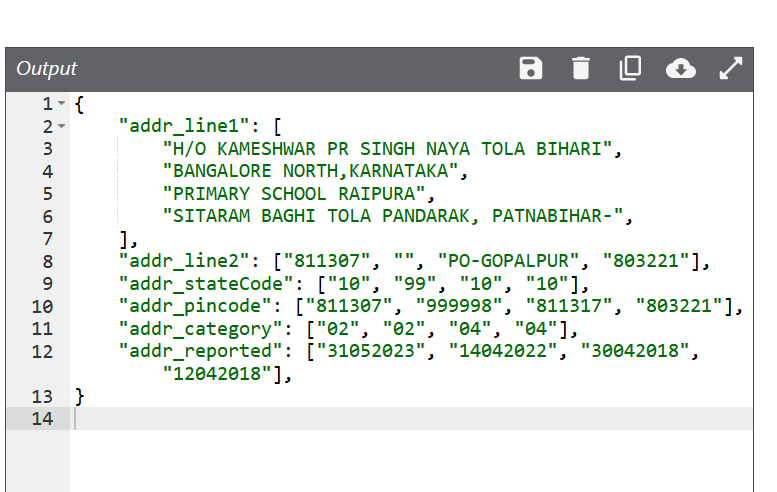


PLEASE NOTE THAT MAPPING IS CORRESPONDING FOR EXAMPLE FOR EACH COLUMN IN THE DATAFRAME 


"addresses":[{"index":"A01","line1":"H/O KAMESHWAR PR SINGH NAYA TOLA BIHARI","line2":"811307","stateCode":"10","pinCode":"811307","addressCategory":"02","dateReported":"31052023"},{"index":"A02","line1":"BANGALORE NORTH,KARNATAKA","stateCode":"99","pinCode":"999998","addressCategory":"02","dateReported":"14042022","enquiryEnriched":"Y"},{"index":"A03","line1":"PRIMARY SCHOOL RAIPURA","line2":"PO-GOPALPUR","line3":"JAMUI","line4":"JAMUI","stateCode":"10","pinCode":"811317","addressCategory":"04","dateReported":"30042018"},{"index":"A04","line1":"SITARAM BAGHI TOLA PANDARAK, PATNABIHAR-","line2":"803221","line4":"PATNA","line5":"PATNA","stateCode":"10","pinCode":"803221","addressCategory":"04","dateReported":"12042018"}]

In [30]:
df.shape

(8, 26)

In [31]:
# Select a specific column entry using indexing
specific_entry = df['accounts'].iloc[0]

#copying to clipboard to check the json response in json viewer 
import pyperclip

pyperclip.copy(specific_entry)

In [32]:
type(specific_entry)

str

In [33]:
df.columns

Index(['leadID', 'is_success', 'cibil_fetch_date', 'name', 'birth_date',
       'gender', 'score', 'total_accounts', 'overdue_accounts',
       'closed_accounts', 'total_sanctioned_amount',
       'total_current_balance_rem', 'total_overdue_running',
       'recent_account_opened', 'oldest_account_opened', 'total_enquiry',
       'last_30_days_enq', 'last_12_days_enq', 'last_24_days_enq',
       'recent_enq_done', 'accounts', 'enquiries', 'identities', 'telephones',
       'emails', 'addresses'],
      dtype='object')

In [34]:
df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [35]:
import pandas as pd
import json

# Assuming  df is your existing DataFrame

def process_accounts(row):
    # Load the JSON string from the 'accounts' column
    accounts_data = json.loads(row['accounts'])
    accounts_df = pd.DataFrame(accounts_data)

    # Initialize dictionaries to store the results
    account_type_counts = {}
    sum_current_balances = {}
    closed_account_counts = {}

    # Group by account_type
    grouped = accounts_df.groupby('account_type')

    for name, group in grouped:
        # Count of each account type
        account_type_counts[name] = len(group)

        # Sum of current balance, excluding zero balances
        non_zero_balances = group[group['currentBalance'] != 0]
        sum_current_balances[name] = non_zero_balances['currentBalance'].sum()

        # Count of closed accounts (currentBalance == 0)
        closed_account_counts[name + '_closed'] = len(group[group['currentBalance'] == 0])

    return pd.Series([account_type_counts, sum_current_balances, closed_account_counts])

# Apply the function to each row
new_columns =  df.apply(process_accounts, axis=1)
new_columns.columns = ['Account Type Count', 'Sum of Current Balances', 'Closed Account Count']

# Concatenate these new columns to your original DataFrame
final_df = pd.concat([ df, new_columns], axis=1)


In [36]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [37]:
# Select a specific column entry using indexing
specific_entry = df['accounts'].iloc[5]

#copying to clipboard to check the json response in json viewer 
import pyperclip

pyperclip.copy(specific_entry)

In [38]:
final_df.columns

Index(['leadID', 'is_success', 'cibil_fetch_date', 'name', 'birth_date',
       'gender', 'score', 'total_accounts', 'overdue_accounts',
       'closed_accounts', 'total_sanctioned_amount',
       'total_current_balance_rem', 'total_overdue_running',
       'recent_account_opened', 'oldest_account_opened', 'total_enquiry',
       'last_30_days_enq', 'last_12_days_enq', 'last_24_days_enq',
       'recent_enq_done', 'accounts', 'enquiries', 'identities', 'telephones',
       'emails', 'addresses', 'Account Type Count', 'Sum of Current Balances',
       'Closed Account Count'],
      dtype='object')

In [39]:
final_df.to_excel('sample_check.xlsx',index=False)

### Mapping cibil values to the encodings

In [40]:
df_cibil = pd.read_csv('cibil_dictionary(2).csv')

In [41]:
df_cibil.head()

Account Type Loan Type                      Description
0             1    Secured            Auto Loan (Personal)
1             2    Secured                    Housing Loan
2             3    Secured                   Property Loan
3             4    Secured  Loan Against Shares/Securities
4             5  Unsecured                   Personal Loan

In [42]:
# Convert 'Account Type' to string and add leading zero if needed
df_cibil['Account Type'] = df_cibil['Account Type'].apply(lambda x: str(x).zfill(2))

# Convert 'Account Type' column to object type
df_cibil['Account Type'] = df_cibil['Account Type'].astype(object)

In [43]:
print(df_cibil.head())

  Account Type Loan Type                      Description
0           01    Secured            Auto Loan (Personal)
1           02    Secured                    Housing Loan
2           03    Secured                   Property Loan
3           04    Secured  Loan Against Shares/Securities
4           05  Unsecured                   Personal Loan


In [44]:
df_cibil.columns

Index(['Account Type', 'Loan Type ', 'Description'], dtype='object')

In [45]:
# Merge 'Loan Type' and 'Description' with an underscore
df_cibil['description'] = df_cibil.apply(lambda row: row['Description'].replace(' ', '_').lower() + '_' + row['Loan Type '].lower(), axis=1)


In [46]:
df_cibil.head()

Account Type Loan Type                      Description  \
0           01    Secured            Auto Loan (Personal)   
1           02    Secured                    Housing Loan   
2           03    Secured                   Property Loan   
3           04    Secured  Loan Against Shares/Securities   
4           05  Unsecured                   Personal Loan   

                              description  
0            auto_loan_(personal)_secured  
1                    housing_loan_secured  
2                   property_loan_secured  
3  loan_against_shares/securities_secured  
4                 personal_loan_unsecured

In [47]:
# List of columns to drop
columns_to_drop = ['Loan Type ', 'Description']

# Drop the specified columns
df_cibil = df_cibil.drop(columns=columns_to_drop)


In [48]:
df_cibil.head()

Account Type                             description
0           01            auto_loan_(personal)_secured
1           02                    housing_loan_secured
2           03                   property_loan_secured
3           04  loan_against_shares/securities_secured
4           05                 personal_loan_unsecured

In [49]:
df_cibil.columns

Index(['Account Type', 'description'], dtype='object')

In [50]:
import pandas as pd

# Assuming 'final_df' is your DataFrame with the account information
# 'df_cibil' is your DataFrame with the account type descriptions

# Ensure the account types in df_cibil are strings with leading zeroes
df_cibil['Account Type'] = df_cibil['Account Type'].apply(lambda x: str(x).zfill(2))

# Create a mapping dictionary for account types to descriptions
account_type_description_mapping = df_cibil.set_index('Account Type')['description'].to_dict()

# Function to map account types to descriptions
def map_account_descriptions(account_dict, mapping, closed_suffix='_closed'):
    new_account_dict = {}
    for k, v in account_dict.items():
        # Remove the '_closed' suffix if present
        key = k.replace(closed_suffix, '') if k.endswith(closed_suffix) else k
        # Map the account type code to its description, default to 'Unknown' if not found
        description = mapping.get(key, 'Unknown')
        # Add the '_closed' suffix back if it was present
        new_key = f'{description}{closed_suffix}' if k.endswith(closed_suffix) else description
        new_account_dict[new_key] = v
    return new_account_dict

# Apply the mapping function to the 'Account Type Count' and 'Sum of Current Balances' columns
final_df['Account Type Count'] = final_df['Account Type Count'].apply(map_account_descriptions, mapping=account_type_description_mapping)
final_df['Sum of Current Balances'] = final_df['Sum of Current Balances'].apply(map_account_descriptions, mapping=account_type_description_mapping)

# Apply the mapping function to 'Closed Account Count' with the consideration of '_closed' suffix
final_df['Closed Account Count'] = final_df['Closed Account Count'].apply(
    lambda x: map_account_descriptions(x, account_type_description_mapping, '_closed')
)

# Now 'final_df' should have the account type codes replaced with the descriptions from 'df_cibil'


In [51]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [52]:
# Function to sum values for keys containing 'unsecured'
def sum_unsecured_loans(balance_dict):
    return sum(value for key, value in balance_dict.items() if 'unsecured' in key.lower())

# Apply this function to the 'Sum of Current Balances' column to create the new column
final_df['amt_pos_unsecured_loans'] = final_df['Sum of Current Balances'].apply(sum_unsecured_loans)


In [53]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [54]:
# # Get the value in the second row (index 1) of column 'B'
# cell_value = final_df.at[1, 'accounts']

# print(cell_value)

#1 Check response from here

In [55]:
# Select a specific column entry using indexing
specific_entry = final_df['accounts'].iloc[1]

#copying to clipboard to check the json response in json viewer 
import pyperclip

pyperclip.copy(specific_entry)

In [56]:
import pandas as pd
from datetime import datetime, timedelta

# Define the function that will process each row in the DataFrame
def new_accounts(row, periods):
    # Parse the JSON in the 'accounts' column
    account_data = json.loads(row['accounts'])
    # Extract the 'date_opened' list from the account data
    dates_opened = account_data['date_opened']
    # Convert the 'cibil_fetch_date' to a datetime object
    fetch_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    
    # Initialize a dictionary to hold the counts for each period
    new_accounts_counts = {}
    
    # Loop over the specified time periods
    for period in periods:
        # Count the number of new accounts for each time period
        count = sum(1 for date_str in dates_opened if fetch_date - datetime.strptime(date_str, '%d%m%Y') <= timedelta(days=period))
        # Add the count to the dictionary
        new_accounts_counts[f'new_accounts_open_{period}_days'] = count
    
    return pd.Series(new_accounts_counts)

# Specify the time periods you're interested in
time_periods = [7, 10, 30, 45, 60, 90, 120, 180, 365]

# Apply the function to each row of the DataFrame
# Assuming 'df' is your main DataFrame
new_account_columns = final_df.apply(new_accounts, axis=1, periods=time_periods)

# Join the new columns to the original DataFrame
final_df = pd.concat([final_df, new_account_columns], axis=1)


In [57]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [58]:
def max_credit(row, period_months):
    # Parse the 'accounts' JSON
    account_data = json.loads(row['accounts'])

    # Convert the 'cibil_fetch_date' to a datetime object
    fetch_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')

    # Calculate the period start date
    period_start_date = fetch_date - timedelta(days=30 * period_months)

    # Initialize maximum credit amount
    max_amount = 0

    # Iterate over 'date_opened' and 'highCreditAmount'
    for date_opened, amount in zip(account_data['date_opened'], account_data['highCreditAmount']):
        date = datetime.strptime(date_opened, '%d%m%Y')

        # Ensure amount is a string for isdigit check and then convert to integer
        amount = int(amount) if str(amount).isdigit() else 0

        if period_start_date <= date <= fetch_date:
            max_amount = max(max_amount, amount)

    return max_amount


# Apply the function to each row for 2 years and 6 months periods
final_df['max_loan_amount_serviced_last_2_years'] = final_df.apply(lambda x: max_credit(x, 24), axis=1)
final_df['max_loan_amount_serviced_last_1_years'] = final_df.apply(lambda x: max_credit(x, 12), axis=1)
final_df['max_loan_amount_serviced_last_9_months'] = final_df.apply(lambda x: max_credit(x, 9), axis=1)
final_df['max_loan_amount_serviced_last_6_months'] = final_df.apply(lambda x: max_credit(x, 6), axis=1)
final_df['max_loan_amount_serviced_last_3_months'] = final_df.apply(lambda x: max_credit(x, 3), axis=1)


In [59]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

### Mapping credit faciltiy status

In [60]:
df_cf_status = pd.read_excel('credit_facility_dictionary.xlsx')

In [61]:
df_cf_status.head()

Credit Facility Status                        Description
0                       0                  Restructured Loan
1                       1  Restructured Loan (Govt.Mandated)
2                       2                        Written-off
3                       3                            Settled
4                       4                  Post (WO) Settled

In [62]:
df_cf_status.columns

Index(['Credit Facility Status', 'Description'], dtype='object')

In [63]:
# Convert 'Account Type' to string and add leading zero if needed
df_cf_status['Credit Facility Status'] = df_cf_status['Credit Facility Status'].apply(lambda x: str(x).zfill(2))

# Convert 'Account Type' column to object type
df_cf_status['Credit Facility Status'] = df_cf_status['Credit Facility Status'].astype(object)

In [64]:
df_cf_status.sample(3)

Credit Facility Status                        Description
8                      08  Account Purchased and Written Off
17                     17                  Guarantee Invoked
7                      07                  Account Purchased

In [65]:
# Create a mapping dictionary from df_cf_status
cf_status_mapping = df_cf_status.set_index('Credit Facility Status')['Description'].to_dict()

# Function to parse accounts JSON, map credit facility status, and retrieve the corresponding details
def map_cf_status_with_details(row):
    account_data = json.loads(row['accounts'])
    mapped_details = []

    for status, date_reported, wo_total, wo_principal, overdue in zip(
        account_data['creditFacilityStatus'], account_data['date_reported'], 
        account_data['woAmountTotal'], account_data['woAmountPrincipal'], 
        account_data['amountOverdue']):
        # Check if status is not empty
        if status:
            # Map the status code to its description, default to 'Unknown' if not found
            description = cf_status_mapping.get(status, 'Unknown')
            # Combine the description with date reported and other details
            details = f"{description} (Date: {date_reported}, WO Total: {wo_total}, WO Principal: {wo_principal}, Overdue: {overdue})"
            mapped_details.append(details)

    return ', '.join(mapped_details)  # Join all details into a single string

# Apply the function to each row of the DataFrame
final_df['Mapped Credit Facility Status with Details'] = final_df.apply(map_cf_status_with_details, axis=1)

In [66]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [67]:
# Select a specific column entry using indexing
specific_entry = final_df['accounts'].iloc[2]

#copying to clipboard to check the json response in json viewer 
import pyperclip

pyperclip.copy(specific_entry)

In [68]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [69]:
# Assuming final_df is your main DataFrame

def calculate_counts_and_sums(row, phrase, amount_keys, period_months=None):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    period_start_date = cibil_date - timedelta(days=30 * period_months) if period_months else None

    count = 0
    total_amounts = [0] * len(amount_keys)  # Initialize a list of totals for each amount key
    for status, date_reported, *amounts in zip(account_data['creditFacilityStatus'], account_data['date_reported'], *[account_data[key] for key in amount_keys]):
        if status and phrase in cf_status_mapping.get(status, '') and any(amounts):
            status_date = datetime.strptime(date_reported, '%d%m%Y')
            if (not period_months) or (status_date >= period_start_date):
                count += 1
                for i, amount in enumerate(amounts):
                    total_amounts[i] += float(amount or 0)

    return (count, *total_amounts)

# Apply the functions to create new columns for each time frame
time_frames = [3, 6, 9, 12,18, 24]
for months in time_frames:
    final_df[f'counts_written_off_last_{months}_months'], final_df[f'sum_written_off_total_last_{months}_months'] = zip(*final_df.apply(lambda x: calculate_counts_and_sums(x, 'Written-off', ['woAmountTotal'], months), axis=1))
    results = final_df.apply(lambda x: calculate_counts_and_sums(x, 'Settled', ['woAmountTotal', 'woAmountPrincipal', 'settlementAmount'], months), axis=1)
    final_df[f'counts_settled_last_{months}_months'] = results.apply(lambda x: x[0])
    final_df[f'sum_woAmountTotal_last_{months}_months'] = results.apply(lambda x: x[1])
    final_df[f'sum_woAmountPrincipal_last_{months}_months'] = results.apply(lambda x: x[2])
    final_df[f'sum_settlementAmount_last_{months}_months'] = results.apply(lambda x: x[3])

In [70]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [71]:
final_df.shape

(8, 81)

In [72]:
# Assuming final_df is your main DataFrame

def calculate_max_and_sum_within_period(row, key, period_months):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    start_date = cibil_date - timedelta(days=30 * period_months)

    max_value = 0
    sum_value = 0
    for date_reported, value in zip(account_data['date_reported'], account_data[key]):
        # Check if the value is present and not an empty string
        if value and value != "":
            reported_date = datetime.strptime(date_reported, '%d%m%Y')
            if start_date <= reported_date <= cibil_date:
                num_value = float(value)
                max_value = max(max_value, num_value)
                sum_value += num_value

    return max_value, sum_value

# Define the keys and time frames
keys = ['creditLimit', 'cashLimit', 'amountOverdue', 'currentBalance', 'emiAmount']  # Add other keys as needed
time_frames = [6, 9, 12, 18, 24]  # Time frames in months

# Apply the function for each key and time frame
for key in keys:
    for months in time_frames:
        final_df[f'max_{key}_last_{months}_months'], final_df[f'sum_{key}_last_{months}_months'] = zip(*final_df.apply(lambda x: calculate_max_and_sum_within_period(x, key, months), axis=1))


In [73]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [74]:
def max_value_overall(row, key):
    account_data = json.loads(row['accounts'])
    max_value = 0

    for value in account_data[key]:
        # Check if the value is present and not an empty string
        if value and value != "":
            max_value = max(max_value, float(value))

    return max_value

# Define the keys for which to calculate the maximum value
keys = ['amountOverdue', 'currentBalance']

# Apply the function for each key
for key in keys:
    final_df[f'max_{key}_overall'] = final_df.apply(lambda x: max_value_overall(x, key), axis=1)


In [75]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [76]:
def count_new_accounts(row, min_amount, max_amount, exclude_account_type, period_days):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    start_date = cibil_date - timedelta(days=period_days)

    count = 0
    for date_opened, account_type, high_credit in zip(account_data['date_opened'], account_data['account_type'], account_data['highCreditAmount']):
        opened_date = datetime.strptime(date_opened, '%d%m%Y')
        high_credit_amount = float(high_credit) if high_credit and high_credit != "" else 0

        if start_date <= opened_date <= cibil_date and (min_amount <= high_credit_amount <= max_amount) and account_type != exclude_account_type:
            count += 1

    return count


# First, create the new columns as separate series
new_open_acc_gt_1lac_non_cc_60days = final_df.apply(lambda x: count_new_accounts(x, 100000, float('inf'), '10', 60), axis=1)
new_open_acc_lt_1lac_non_cc_60days = final_df.apply(lambda x: count_new_accounts(x, 0, 100000, '10', 60), axis=1)
new_open_acc_non_cc_60days = final_df.apply(lambda x: count_new_accounts(x, 0, float('inf'), '10', 60), axis=1)

# Then, concatenate these new columns to the original DataFrame all at once
final_df = pd.concat([final_df, new_open_acc_gt_1lac_non_cc_60days, new_open_acc_lt_1lac_non_cc_60days, new_open_acc_non_cc_60days], axis=1)

# If needed, rename the new columns
final_df.columns = [*final_df.columns[:-3], 'new_open_acc_gt_1lac_non_cc_60days', 'new_open_acc_lt_1lac_non_cc_60days', 'new_open_acc_non_cc_60days']


In [77]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [78]:
# Assuming final_df is your main DataFrame

def sum_for_specific_account_type(row, account_types, keys):
    account_data = json.loads(row['accounts'])
    sums = {key: 0 for key in keys}  # Initialize sums for each key 

    for account_type, *values in zip(account_data['account_type'], *[account_data[key] for key in keys]):
        if account_type in account_types:  # Check for specified account types
            for key, value in zip(keys, values):
                if value and value != "":  # Check if the value is not empty
                    sums[key] += float(value)

    return [sums[key] for key in keys]

# Define the keys for which to calculate the sum
keys = ['highCreditAmount', 'amountOverdue', 'currentBalance']

# Apply the function for account type 10
results_type_10 = final_df.apply(lambda x: sum_for_specific_account_type(x, ['10'], keys), axis=1)
final_df['total_sanctioned_amount_cc'], final_df['total_outstanding_amount_cc'], final_df['total_currentBalance_cc'] = zip(*results_type_10)

# Apply the function for account type 12
results_type_12 = final_df.apply(lambda x: sum_for_specific_account_type(x, ['12'], keys), axis=1)
final_df['total_sanctioned_amount_od'], final_df['total_outstanding_amount_od'], final_df['total_currentBalance_od'] = zip(*results_type_12)


In [79]:
final_df.head(10)

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   
5  136639        True         27012024   
6  125591        True         16062023   
7  132115        True         26062023   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   
5                       BHARAT BHARAT SONI   28032000      2    765   
6                        NAGAMANI JATAVATH   03071991      1    136   
7    MEKALA VENKATESWARLU BASAVAIAH MEKALA   29011992      2    743   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   
5              18                 0               11                 14689696   
6               0                 0                0                        0   
7              54                 1               41                  1269384   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   
5                    9246526                      0              25082023   
6                          0                      0              01011900   
7                     305079                 163112              28052023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   
5              15062019             91                 9                55   
6              01011900             15                12                 2   
7              27022015             33                 1                31   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   
5                21        24012024   
6                 1        12062023   
7                 1        04062023   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   
5  {"account_type": ["12", "01", "06", "10", "05"...   
6  {"account_type": [], "ownership_indicator": []...   
7  {"account_type": ["10", "05", "05", "69", "05"...   



In [80]:

def sum_for_active_accounts(row, account_types, keys):
    account_data = json.loads(row['accounts'])
    sums = {key: 0 for key in keys}  # Initialize sums for each key

    for account_type, date_closed, *values in zip(account_data['account_type'], account_data['date_closed'], *[account_data[key] for key in keys]):
        if account_type in account_types and (not date_closed or date_closed == ""):
            # Account is active and of the specified type
            for key, value in zip(keys, values):
                if value and value != "":  # Check if the value is not empty
                    sums[key] += float(value)

    return [sums[key] for key in keys]

# Define the keys for which to calculate the sum
keys = ['highCreditAmount', 'amountOverdue', 'currentBalance']

# Apply the function for account types 05 and 69
results_type_05_69 = final_df.apply(lambda x: sum_for_active_accounts(x, ['05', '69'], keys), axis=1)
final_df['total_sanctioned_amount_active_pl_bl'], final_df['total_outstanding_amount_active_pl_bl'], final_df['total_currentBalance_active_pl_bl'] = zip(*results_type_05_69)


In [81]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [82]:
# Assuming final_df is your main DataFrame

def sum_for_active_accounts_of_types(account_data, account_types, keys):
    sums = {key: 0 for key in keys}  # Initialize sums for each key

    for account_type, date_closed, *values in zip(account_data['account_type'], account_data['date_closed'], *[account_data[key] for key in keys]):
        if account_type in account_types and (not date_closed or date_closed == ""):
            # Account is active and of the specified type
            for key, value in zip(keys, values):
                if value and value != "":  # Check if the value is not empty
                    sums[key] += float(value)

    return [sums[key] for key in keys]

# Define the keys for which to calculate the sum
keys = ['highCreditAmount']

# Apply the function for account types 05 and 06
final_df['sanctioned_amount_active_pl_cd_loan'] = final_df['accounts'].apply(lambda x: sum_for_active_accounts_of_types(json.loads(x), ['05', '06'], keys).pop())


In [83]:
final_df.head(10)

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   
5  136639        True         27012024   
6  125591        True         16062023   
7  132115        True         26062023   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   
5                       BHARAT BHARAT SONI   28032000      2    765   
6                        NAGAMANI JATAVATH   03071991      1    136   
7    MEKALA VENKATESWARLU BASAVAIAH MEKALA   29011992      2    743   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   
5              18                 0               11                 14689696   
6               0                 0                0                        0   
7              54                 1               41                  1269384   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   
5                    9246526                      0              25082023   
6                          0                      0              01011900   
7                     305079                 163112              28052023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   
5              15062019             91                 9                55   
6              01011900             15                12                 2   
7              27022015             33                 1                31   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   
5                21        24012024   
6                 1        12062023   
7                 1        04062023   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   
5  {"account_type": ["12", "01", "06", "10", "05"...   
6  {"account_type": [], "ownership_indicator": []...   
7  {"account_type": ["10", "05", "05", "69", "05"...   



In [84]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json

def get_monthly_dpd(payment_history, start_date_str):
    start_date = datetime.strptime(start_date_str, '%d%m%Y')
    monthly_dpd = {}
    for i in range(0, len(payment_history), 3):
        month = start_date + relativedelta(months=i//3)
        dpd = payment_history[i:i+3]
        monthly_dpd[month] = int(dpd) if dpd.isdigit() else 0
    return monthly_dpd

def calculate_max_dpd_for_timeframe(monthly_dpd, cibil_date, months_back):
    max_dpd = 0
    for month, dpd in monthly_dpd.items():
        if cibil_date - relativedelta(months=months_back) <= month <= cibil_date:
            max_dpd = max(max_dpd, dpd)
    return max_dpd

def calculate_max_dpd_all_accounts(row, timeframes):
    if not isinstance(timeframes, list):
        timeframes = [timeframes]
    
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    results = {}

    for timeframe in timeframes:
        max_dpd = 0
        for payment_history, start_date_str in zip(account_data['paymentHistory'], account_data['paymentStartDate']):
            monthly_dpd = get_monthly_dpd(payment_history, start_date_str)
            max_dpd = max(max_dpd, calculate_max_dpd_for_timeframe(monthly_dpd, cibil_date, timeframe))
        results = max_dpd

    return results

# Apply the function for each row and timeframe
timeframes = [3, 6, 9, 12, 24]
for timeframe in timeframes:
    final_df[f'check_max_dpd_last_{timeframe}_months'] = final_df.apply(lambda x: calculate_max_dpd_all_accounts(x, timeframe), axis=1)


In [85]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [86]:
# # Get the value in the second row (index 1) of column 'B'

cell_value = final_df.at[1, 'identities']

print(cell_value)

{"id_type": ["01", "03", "06"], "id_number": ["AOMPR2582N", "SNM6424535", "449297226409"]}


In [87]:
# Convert DataFrame to dictionary 'Account Type', 'description'
account_types_dict = df_cibil.set_index('Account Type')['description'].to_dict()


In [88]:

def count_account_types(row, account_types_dict):
    # Load the account types from the row
    account_data = json.loads(row['accounts'])
    account_codes = account_data['account_type']

    # Count occurrences of each account type with 'count_' prefix in column names
    counts = {'count_' + name: 0 for name in account_types_dict.values()}
    for code in account_codes:
        if code in account_types_dict:
            counts['count_' + account_types_dict[code]] += 1

    return pd.Series(counts)

# Apply the function and join the results to the DataFrame
account_type_counts = final_df.apply(lambda row: count_account_types(row, account_types_dict), axis=1)
final_df = final_df.join(account_type_counts)




In [89]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [90]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json

# Function to classify account types as secured or unsecured
secured_account_types = set(["01", "02", "03", "04", "07", "11", "13", "14", "15", "17", "31", "32", "33", "34", "40", "41", "42", "43", "44", "46", "50", "51", "52", "53", "54", "55", "56", "57", "58", "59", "70"])
def is_secured(account_type):
    return account_type in secured_account_types

# Function to count enquiries
def count_enquiries(enquiry_data, cibil_date_str, timeframes):
    cibil_date = datetime.strptime(cibil_date_str, '%d%m%Y')
    enquiry_dates = enquiry_data["enquiry_date"]
    account_types = enquiry_data["enquiry_purpose"]

    results = {f'enquiry_secured_count_{months}_months': 0 for months in timeframes}
    results.update({f'enquiry_unsecured_count_{months}_months': 0 for months in timeframes})

    for enquiry_date_str, account_type in zip(enquiry_dates, account_types):
        enquiry_date = datetime.strptime(enquiry_date_str, '%d%m%Y')
        is_secured_enquiry = is_secured(account_type)

        for months in timeframes:
            if cibil_date - relativedelta(months=months) <= enquiry_date <= cibil_date:
                key = 'secured' if is_secured_enquiry else 'unsecured'
                results[f'enquiry_{key}_count_{months}_months'] += 1

    return results

# Applying the function to each row in the DataFrame
timeframes = [3, 6, 9, 12, 24]
for timeframe in timeframes:
    final_df[f'enquiry_secured_count_{timeframe}_months'] = 0
    final_df[f'enquiry_unsecured_count_{timeframe}_months'] = 0

for index, row in final_df.iterrows():
    enquiry_data = json.loads(row['enquiries'])
    counts = count_enquiries(enquiry_data, row['cibil_fetch_date'], timeframes)

    for timeframe in timeframes:
        final_df.at[index, f'enquiry_secured_count_{timeframe}_months'] = counts[f'enquiry_secured_count_{timeframe}_months']
        final_df.at[index, f'enquiry_unsecured_count_{timeframe}_months'] = counts[f'enquiry_unsecured_count_{timeframe}_months']


In [91]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [92]:
def count_specific_account_type_enquiries(enquiry_data, cibil_date_str, timeframes, specific_account_type):
    cibil_date = datetime.strptime(cibil_date_str, '%d%m%Y')
    enquiry_dates = enquiry_data["enquiry_date"]
    account_types = enquiry_data["enquiry_purpose"]

    # Initialize a dictionary to hold the counts for each timeframe
    results = {f'enquiry_count_{specific_account_type}_{months}_months': 0 for months in timeframes}

    # Iterate through each enquiry
    for enquiry_date_str, account_type in zip(enquiry_dates, account_types):
        enquiry_date = datetime.strptime(enquiry_date_str, '%d%m%Y')

        # Check if the account type matches the specific type we're interested in
        if account_type == specific_account_type:
            for months in timeframes:
                # Check if the enquiry date falls within the specified timeframe from the cibil date
                if cibil_date - relativedelta(months=months) <= enquiry_date <= cibil_date:
                    results[f'enquiry_count_{specific_account_type}_{months}_months'] += 1

    return results

# Define the specific account type and timeframes
specific_account_type = "05"
timeframes = [1, 2, 3, 6]

# Initialize new columns in the DataFrame
for timeframe in timeframes:
    final_df[f'enquiry_count_{specific_account_type}_{timeframe}_months'] = 0

# Apply the function to each row in the DataFrame
for index, row in final_df.iterrows():
    enquiry_data = json.loads(row['enquiries'])
    counts = count_specific_account_type_enquiries(enquiry_data, row['cibil_fetch_date'], timeframes, specific_account_type)

    for timeframe in timeframes:
        final_df.at[index, f'enquiry_count_{specific_account_type}_{timeframe}_months'] = counts[f'enquiry_count_{specific_account_type}_{timeframe}_months']


In [93]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [94]:

# State code and address category mappings
state_code_mapping = {
        "01": "Jammu & Kashmir",
        "02": "Himachal Pradesh",
        "03": "Punjab",
        "04": "Chandigarh",
        "05": "Uttaranchal",
        "06": "Haryana",
        "07": "Delhi",
        "08": "Rajasthan",
        "09": "Uttar Pradesh",
        "10": "Bihar",
        "11": "Sikkim",
        "12": "Arunachal Pradesh",
        "13": "Nagaland",
        "14": "Manipur",
        "15": "Mizoram",
        "16": "Tripura",
        "17": "Meghalaya",
        "18": "Assam",
        "19": "West Bengal",
        "20": "Jharkhand",
        "21": "Orissa",
        "22": "Chhattisgarh",
        "23": "Madhya Pradesh",
        "24": "Gujarat",
        "25": "Daman & Diu",
        "26": "Dadra & Nagar Haveli",
        "27": "Maharashtra",
        "28": "Andhra Pradesh",
        "29": "Karnataka",
        "30": "Goa",
        "31": "Lakshadweep",
        "32": "Kerala",
        "33": "Tamil Nadu",
        "34": "Pondicherry",
        "35": "Andaman & Nicobar Islands",
        "36": "Telangana",
        "37": "Odisha",  # Note: Odisha might be listed under old code "21" as "Orissa" in some data
        "38": "Ladakh"
    }

# Define your address category mapping
address_category_mapping = {
    "01": "Permanent Address",
    "02": "Residence Address",
    "03": "Office Address",
    "04": "Not Categorized",
    "05": "Mortgage Property Address"
}

# Function to get the latest address for each category
def get_latest_address_for_each_category(row, cibil_fetch_date):
    # Load the address data from the row
    addresses = json.loads(row['addresses'])
    latest_addresses = {f'latest_date_{category}': '' for category in address_category_mapping.values()}
    
    # Convert cibil_fetch_date to datetime
    cibil_date = datetime.strptime(cibil_fetch_date, '%d%m%Y')

    for line1, line2, state_code, pincode, category_code, reported_date in zip(
            addresses['addr_line1'],
            addresses['addr_line2'],
            addresses['addr_stateCode'],
            addresses['addr_pincode'],
            addresses['addr_category'],
            addresses['addr_reported']):

        # Convert reported_date to datetime and check if it's within a year from cibil_fetch_date within 1 year 
        reported_date = datetime.strptime(reported_date, '%d%m%Y')
        if (cibil_date - reported_date).days <= 365:
            category_name = f"latest_date_{address_category_mapping.get(category_code, 'Unknown Category')}"
            state_name = state_code_mapping.get(state_code, "Unknown State")
            full_address = f"{line1}, {line2}, {state_name}, {pincode}"

            # Check if this is the latest address for this category
            if latest_addresses[category_name] == '' or reported_date > datetime.strptime(latest_addresses[category_name].split(' - ')[0], '%d%m%Y'):
                latest_addresses[category_name] = f"{reported_date.strftime('%d%m%Y')} - {full_address}"

    return pd.Series(latest_addresses)

# Assuming final_df is your main DataFrame
# Apply the function and join the results to the DataFrame
final_df = final_df.join(final_df.apply(lambda row: get_latest_address_for_each_category(row, row['cibil_fetch_date']), axis=1))

In [95]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [96]:
# Define the telephone type mapping
telephone_type_mapping = {
    "00": "Not Classified",
    "01": "Mobile Phone",
    "02": "Home Phone",
    "03": "Office Phone"
}

# Function to extract the first occurrence of each telephone type
def extract_first_telephone_of_each_type(row):
    # Load the telephone data from the row
    telephones = json.loads(row['telephones'])
    first_telephones = {f"first_{telephone_type_mapping.get(t_type, 'Unknown Type')}": "" for t_type in telephone_type_mapping.keys()}

    for number, t_type in zip(telephones['telephone_number'], telephones['telephone_type']):
        type_name = f"first_{telephone_type_mapping.get(t_type, 'Unknown Type')}"
        if first_telephones[type_name] == "":
            first_telephones[type_name] = number

    return pd.Series(first_telephones)

# Assuming final_df is your main DataFrame
# Apply the function and join the results to the DataFrame
final_df = final_df.join(final_df.apply(extract_first_telephone_of_each_type, axis=1))

In [97]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [98]:
import pandas as pd
import json

# Secured and unsecured account types
secured_types = ["01", "02", "03", "04", "07", "11", "13", "14", "15", "17", "31", "32", "33", "34", "40", "41", "42", "43", "44", "46", "50", "51", "52", "53", "54", "55", "56", "57", "58", "59", "70"]
unsecured_types = [str(t).zfill(2) for t in range(0, 72) if str(t).zfill(2) not in secured_types]

def calculate_account_metrics(row):
    account_data = json.loads(row['accounts'])

    metrics = {'secured_open_count': 0,
    'secured_closed_count': 0,
    'unsecured_open_count': 0,
    'unsecured_closed_count': 0,
    'secured_max_highCreditAmount': 0,
    'unsecured_max_highCreditAmount': 0,
    'secured_max_currentBalance': 0,
    'unsecured_max_currentBalance': 0,
    'secured_max_amountOverdue': 0,
    'unsecured_max_amountOverdue': 0,
    'secured_max_settlementAmount': 0,
    'unsecured_max_settlementAmount': 0,
    'secured_max_woAmountTotal': 0,
    'unsecured_max_woAmountTotal': 0,
    'secured_max_woAmountPrincipal': 0,
    'unsecured_max_woAmountPrincipal': 0,
    'secured_sum_highCreditAmount': 0,
    'unsecured_sum_highCreditAmount': 0,
    'secured_sum_currentBalance': 0,
    'unsecured_sum_currentBalance': 0,
    'secured_sum_amountOverdue': 0,
    'unsecured_sum_amountOverdue': 0,
    'secured_sum_settlementAmount': 0,
    'unsecured_sum_settlementAmount': 0,
    'secured_sum_woAmountTotal': 0,
    'unsecured_sum_woAmountTotal': 0,
    'secured_sum_woAmountPrincipal': 0,
    'unsecured_sum_woAmountPrincipal': 0,
               
}

    # Sum, max, and min calculations
    sum_max_min_fields = ['highCreditAmount', 'currentBalance', 'amountOverdue', 'settlementAmount', 'woAmountTotal', 'woAmountPrincipal']
    for field in sum_max_min_fields:
        metrics.update({f'secured_sum_{field}': 0, f'unsecured_sum_{field}': 0})
        metrics.update({f'secured_max_{field}': 0, f'unsecured_max_{field}': 0})
        metrics.update({f'secured_min_{field}': float('inf'), f'unsecured_min_{field}': float('inf')})

    for i in range(len(account_data['account_type'])):
        account_type = account_data['account_type'][i]
        is_secured = account_type in secured_types
        is_closed = account_data['date_closed'][i]

        # Open and closed counts
        if is_closed:
            if is_secured:
                metrics['secured_closed_count'] += 1
            else:
                metrics['unsecured_closed_count'] += 1
        else:
            if is_secured:
                metrics['secured_open_count'] += 1
            else:
                metrics['unsecured_open_count'] += 1

        # Sums, max, and min for various fields
        for field in sum_max_min_fields:
            value = float(account_data[field][i]) if account_data[field][i] else 0
            if is_secured:
                metrics[f'secured_sum_{field}'] += value
                metrics[f'secured_max_{field}'] = max(metrics[f'secured_max_{field}'], value)
                if value != 0:  # To avoid considering zero in minimum calculations
                    metrics[f'secured_min_{field}'] = min(metrics[f'secured_min_{field}'], value)
            else:
                metrics[f'unsecured_sum_{field}'] += value
                metrics[f'unsecured_max_{field}'] = max(metrics[f'unsecured_max_{field}'], value)
                if value != 0:  # To avoid considering zero in minimum calculations
                    metrics[f'unsecured_min_{field}'] = min(metrics[f'unsecured_min_{field}'], value)

    # Replace 'inf' with 0 for min values if no non-zero value was found
    for field in sum_max_min_fields:
        for prefix in ['secured_min_', 'unsecured_min_']:
            if metrics[prefix + field] == float('inf'):
                metrics[prefix + field] = 0

    return pd.Series(metrics)

# Apply the function to each row in your DataFrame
final_df = final_df.join(final_df.apply(calculate_account_metrics, axis=1))


In [99]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [100]:

def calculate_timelined_metrics(row, timeframes):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')

    # Initialize metrics dictionary
    metrics = {}
    for timeframe in timeframes:
        for field in ['highCreditAmount', 'currentBalance', 'amountOverdue', 'settlementAmount', 'woAmountTotal', 'woAmountPrincipal','creditLimit','cashLimit']:
            for prefix in ['secured_', 'unsecured_']:
                for metric in ['sum_', 'max_', 'min_']:
                    key = f'{prefix}{metric}{field}_{timeframe}m'
                    metrics[key] = 0 if metric != 'min_' else float('inf')

    # Process each account entry
    for i in range(len(account_data['account_type'])):
        account_type = account_data['account_type'][i]
        is_secured = account_type in secured_types
        reported_date_str = account_data['date_reported'][i]
        reported_date = datetime.strptime(reported_date_str, '%d%m%Y')

        # Check if the account is within each timeframe
        for timeframe in timeframes:
            if cibil_date - relativedelta(months=timeframe) <= reported_date <= cibil_date:
                # Process each field
                for field in ['highCreditAmount', 'currentBalance', 'amountOverdue', 'settlementAmount', 'woAmountTotal', 'woAmountPrincipal','creditLimit','cashLimit']:
                    value = float(account_data[field][i]) if account_data[field][i] else 0
                    prefix = 'secured_' if is_secured else 'unsecured_'

                    # Update sum, max, and min
                    metrics[f'{prefix}sum_{field}_{timeframe}m'] += value
                    metrics[f'{prefix}max_{field}_{timeframe}m'] = max(metrics[f'{prefix}max_{field}_{timeframe}m'], value)
                    if value != 0:  # Avoid considering zero in minimum calculations
                        metrics[f'{prefix}min_{field}_{timeframe}m'] = min(metrics[f'{prefix}min_{field}_{timeframe}m'], value)

    # Replace 'inf' with 0 for min values if no non-zero value was found
    for timeframe in timeframes:
        for field in ['highCreditAmount', 'currentBalance', 'amountOverdue', 'settlementAmount', 'woAmountTotal', 'woAmountPrincipal','creditLimit','cashLimit']:
            for prefix in ['secured_min_', 'unsecured_min_']:
                key = f'{prefix}{field}_{timeframe}m'
                if metrics[key] == float('inf'):
                    metrics[key] = 0

    return pd.Series(metrics)

# Apply the function to each row in your DataFrame
timeframes = [3, 6, 9, 12, 24]
final_df = final_df.join(final_df.apply(lambda row: calculate_timelined_metrics(row, timeframes), axis=1))

In [101]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [102]:
import json
import pandas as pd

def calculate_max_dpd(payment_history):
    max_dpd = 0
    for i in range(0, len(payment_history), 3):
        dpd_group = payment_history[i:i+3]
        if dpd_group.isdigit():
            dpd = int(dpd_group)
            max_dpd = max(max_dpd, dpd)
    return max_dpd

def calculate_max_dpd_metrics(row, secured_types, account_types_dict):
    account_data = json.loads(row['accounts'])

    max_dpd_secured = 0
    max_dpd_unsecured = 0
    max_dpd_per_account_type = {atype: None for atype in account_types_dict.values()}  # Initialize with all account types

    for i in range(len(account_data['account_type'])):
        account_type_code = account_data['account_type'][i]
        payment_history = account_data['paymentHistory'][i]

        # Map account type code to the descriptive name
        account_type = account_types_dict.get(account_type_code, None)
        if account_type is None:
            continue

        is_secured = account_type_code in secured_types
        account_max_dpd = calculate_max_dpd(payment_history)

        if is_secured:
            max_dpd_secured = max(max_dpd_secured, account_max_dpd)
        else:
            max_dpd_unsecured = max(max_dpd_unsecured, account_max_dpd)

        # Update max DPD for this account type
        if max_dpd_per_account_type[account_type] is None or account_max_dpd > max_dpd_per_account_type[account_type]:
            max_dpd_per_account_type[account_type] = account_max_dpd

    metrics = {
        'max_dpd_secured': max_dpd_secured,
        'max_dpd_unsecured': max_dpd_unsecured
    }
    metrics.update({f'max_dpd_{atype}': dpd for atype, dpd in max_dpd_per_account_type.items()})


    return pd.Series(metrics)

# Apply the function to each row in your DataFrame
secured_types = ["01", "02", "03", "04", "07", "11", "13", "14", "15", "17", "31", "32", "33", "34", "40", "41", "42", "43", "44", "46", "50", "51", "52", "53", "54", "55", "56", "57", "58", "59", "70"]

final_df = final_df.join(final_df.apply(lambda row: calculate_max_dpd_metrics(row, secured_types, account_types_dict), axis=1))


In [103]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [104]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import pandas as pd

def calculate_max_dpd(payment_history, start_date_str, cibil_date, months_back):
    start_date = datetime.strptime(start_date_str, '%d%m%Y')
    max_dpd = 0
    for i in range(0, len(payment_history), 3):
        month = start_date - relativedelta(months=i//3)
        if cibil_date - relativedelta(months=months_back) <= month <= cibil_date:
            dpd = payment_history[i:i+3]
            max_dpd = max(max_dpd, int(dpd) if dpd.isdigit() else 0)
    return max_dpd





def calculate_max_dpd_metrics(row, timeframes, account_types_dict, secured_types):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')

    metrics = {atype: {f'max_dpd_{months}m': 0 for months in timeframes} for atype in account_types_dict.values()}
    metrics['overall'] = {f'max_dpd_{months}m': 0 for months in timeframes}
    metrics['secured'] = {f'max_dpd_{months}m': 0 for months in timeframes}
    metrics['unsecured'] = {f'max_dpd_{months}m': 0 for months in timeframes}

    for i in range(len(account_data['account_type'])):
        account_type_code = account_data['account_type'][i]
        account_type = account_types_dict.get(account_type_code, 'Unknown')
        is_secured = account_type_code in secured_types

        for months_back in timeframes:
            max_dpd = calculate_max_dpd(account_data['paymentHistory'][i], account_data['paymentStartDate'][i], cibil_date, months_back)

            metrics[account_type][f'max_dpd_{months_back}m'] = max(max_dpd, metrics[account_type][f'max_dpd_{months_back}m'])
            metrics['overall'][f'max_dpd_{months_back}m'] = max(max_dpd, metrics['overall'][f'max_dpd_{months_back}m'])

            if is_secured:
                metrics['secured'][f'max_dpd_{months_back}m'] = max(max_dpd, metrics['secured'][f'max_dpd_{months_back}m'])
            else:
                metrics['unsecured'][f'max_dpd_{months_back}m'] = max(max_dpd, metrics['unsecured'][f'max_dpd_{months_back}m'])

    return pd.Series(metrics)

# Sample DataFrame and dictionary initialization
# final_df = pd.DataFrame(...) # Your DataFrame
# account_types_dict = {...} # Your account types mapping dictionary
timeframes = [3, 6, 9, 12, 24]
secured_types = ["01", "02", "03", "04", "07", "11", "13", "14", "15", "17", "31", "32", "33", "34", "40", "41", "42", "43", "44", "46", "50", "51", "52", "53", "54", "55", "56", "57", "58", "59", "70"]

final_df = final_df.join(final_df.apply(lambda row: calculate_max_dpd_metrics(row, timeframes, account_types_dict, secured_types), axis=1))


In [105]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [106]:
#final_df.to_excel('check_bre.xlsx',index = False)

In [107]:
# # Get the value in the second row (index 1) of column 'B'

cell_value = final_df.at[4, 'overall']

print(cell_value)

{'max_dpd_3m': 0, 'max_dpd_6m': 0, 'max_dpd_9m': 0, 'max_dpd_12m': 0, 'max_dpd_24m': 42}


In [108]:
# Function to extract values from the dictionary and create new columns
def extract_dpd_metrics(row):
    new_data = {}
    for col in row.index:
        if isinstance(row[col], dict):
            for key, value in row[col].items():
                # Adding 'last' before the time frame in the column name
                time_frame = key.replace("max_dpd_", "max_dpd_last")
                new_col_name = f"{col}_{time_frame}"
                new_data[new_col_name] = value
    return pd.Series(new_data)

# Find the index of 'max_dpd_other_unsecured' and select all columns after it
start_index = final_df.columns.get_loc('max_dpd_other_unsecured') + 1
dict_columns = final_df.columns[start_index:]

# Apply the function to the DataFrame
new_columns_df = final_df[dict_columns].apply(extract_dpd_metrics, axis=1)

# Concatenate the new columns with the original DataFrame
final_df = pd.concat([final_df, new_columns_df], axis=1)

# Optionally, you can drop the original dictionary columns if they are no longer needed
final_df.drop(dict_columns, axis=1, inplace=True)


In [109]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [110]:

def calculate_max_dpd(payment_history):
    max_dpd = 0
    for i in range(0, len(payment_history), 3):
        dpd_group = payment_history[i:i+3]
        if dpd_group.isdigit():
            dpd = int(dpd_group)
            max_dpd = max(max_dpd, dpd)
    return max_dpd


def calculate_max_dpd_for_active_loans(account_data):
    max_dpd_per_type = {atype: 0 for atype in account_types_dict.values()}
    
    for i in range(len(account_data['account_type'])):
        account_type_code = account_data['account_type'][i]
        account_type = account_types_dict.get(account_type_code, None)
        if account_type is None or account_data['date_closed'][i]:
            continue  # Skip if account type is not found or the account is closed

        payment_history = account_data['paymentHistory'][i]
        max_dpd = calculate_max_dpd(payment_history)
        max_dpd_per_type[account_type] = max(max_dpd_per_type[account_type], max_dpd)

    return max_dpd_per_type


def extract_active_max_dpd(row):
    account_data = json.loads(row['accounts'])
    active_max_dpd = calculate_max_dpd_for_active_loans(account_data)
    # Format the column names
    return {f'active_max_dpd_{account_type.replace("_", " ")}': dpd for account_type, dpd in active_max_dpd.items()}




# Apply the function to each row in your DataFrame
active_max_dpd_df = final_df.apply(extract_active_max_dpd, axis=1)

# Concatenate the new columns with the original DataFrame
final_df = pd.concat([final_df, active_max_dpd_df], axis=1)



In [111]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [112]:
final_df.shape

(8, 815)

In [113]:
# Apply the function to each row in your DataFrame and create a new DataFrame from the results
active_max_dpd_df = final_df.apply(extract_active_max_dpd, axis=1)
new_columns_df = pd.DataFrame.from_records(active_max_dpd_df)

# Join the new columns with the original DataFrame
final_df = final_df.join(new_columns_df)

In [114]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [115]:
# Optionally, you can drop the original dictionary columns if they are no longer needed
final_df.drop(0, axis=1, inplace=True)

In [116]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [117]:
def is_within_timeframe(closing_date_str, cibil_date, months_back):
    if closing_date_str:
        closing_date = datetime.strptime(closing_date_str, '%d%m%Y')
        return cibil_date - relativedelta(months=months_back) <= closing_date <= cibil_date
    return False

def calculate_closed_accounts(account_data, cibil_date, timeframes):
    closed_counts = {f'closed_{months}_months': {atype: 0 for atype in account_types_dict.values()} for months in timeframes}

    for i in range(len(account_data['account_type'])):
        account_type_code = account_data['account_type'][i]
        account_type = account_types_dict.get(account_type_code, None)
        if account_type is None or not account_data['date_closed'][i]:
            continue

        for months_back in timeframes:
            if is_within_timeframe(account_data['date_closed'][i], cibil_date, months_back):
                closed_counts[f'closed_{months_back}_months'][account_type] += 1

    return closed_counts

def extract_closed_account_counts(row):
    account_data = json.loads(row['accounts'])
    cibil_date = datetime.strptime(row['cibil_fetch_date'], '%d%m%Y')
    timeframes = [3, 6, 9, 12, 24]
    closed_account_counts = calculate_closed_accounts(account_data, cibil_date, timeframes)

    # Flatten the dictionary for DataFrame format
    flattened = {}
    for timeframe, counts in closed_account_counts.items():
        for account_type, count in counts.items():
            flattened[f'{account_type}_closed_{timeframe}'] = count
    return flattened

# Apply the function to each row in your DataFrame
closed_accounts_df = final_df.apply(extract_closed_account_counts, axis=1)

# Join the new columns with the original DataFrame
final_df = final_df.join(pd.DataFrame.from_records(closed_accounts_df))


In [118]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [119]:
def calculate_specific_active_accounts(account_data):
    count = 0
    for i in range(len(account_data['account_type'])):
        # Check if the account is active
        if not account_data['date_closed'][i]:
            # Convert loan amount to a float, handle missing or empty values
            loan_amount = float(account_data['highCreditAmount'][i]) if account_data['highCreditAmount'][i] else 0
            # Calculate max DPD for this account
            max_dpd = calculate_max_dpd(account_data['paymentHistory'][i])

            # Check if loan amount is less than 15000 and max DPD is greater than 30
            if loan_amount < 15000 and max_dpd > 30:
                count += 1

    return count

# Apply the function to each row in your DataFrame
final_df['active_loans_lt_15000_max_dpd_gt_30'] = final_df.apply(lambda row: calculate_specific_active_accounts(json.loads(row['accounts'])), axis=1)


In [120]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True         24062023   
1  128573        True         25062023   
2  113026        True         29052023   
3  120480        True         09062023   
4  133278        True         20012024   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA   01071988      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA   20071981      1    756   
2          V REDDY KISHORE REDDY V KISHORE   04041986      2    710   
3                     NULL DEEPJYOTI NAYAK   16121996      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI   28091974      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0              14092011             13                10                 3   
1              13082008             24                15                 4   
2              29042006             98                 8                46   
3              16012020             85                 2                40   
4              31081996             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [121]:
# Function to convert date string from ddmmyyyy to datetime object
def convert_date(date_str):
    return datetime.strptime(date_str, '%d%m%Y')

# Convert dates to datetime format
final_df['cibil_fetch_date'] = final_df['cibil_fetch_date'].apply(convert_date)
final_df['birth_date'] = final_df['birth_date'].apply(convert_date)
final_df['oldest_account_opened'] = final_df['oldest_account_opened'].apply(convert_date)

# Calculate age with respect to cibil_fetch_date
final_df['age'] = final_df.apply(lambda x: relativedelta(x['cibil_fetch_date'], x['birth_date']).years, axis=1)

# Calculate credit age with respect to cibil_fetch_date
final_df['credit_age'] = final_df.apply(lambda x: relativedelta(x['cibil_fetch_date'], x['oldest_account_opened']).years, axis=1)


In [122]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True       2023-06-24   
1  128573        True       2023-06-25   
2  113026        True       2023-05-29   
3  120480        True       2023-06-09   
4  133278        True       2024-01-20   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA 1988-07-01      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA 1981-07-20      1    756   
2          V REDDY KISHORE REDDY V KISHORE 1986-04-04      2    710   
3                     NULL DEEPJYOTI NAYAK 1996-12-16      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI 1974-09-28      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0            2011-09-14             13                10                 3   
1            2008-08-13             24                15                 4   
2            2006-04-29             98                 8                46   
3            2020-01-16             85                 2                40   
4            1996-08-31             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [123]:
final_df.columns

Index(['leadID', 'is_success', 'cibil_fetch_date', 'name', 'birth_date',
       'gender', 'score', 'total_accounts', 'overdue_accounts',
       'closed_accounts',
       ...
       'business_non-funded_credit_facility_-_priority_sector_-_others_secured_closed_closed_24_months',
       'business_loan_against_bank_deposits_secured_closed_closed_24_months',
       'business_loan_-_unsecured_unsecured_closed_closed_24_months',
       'short_term_personal_loan_unsecured_closed_closed_24_months',
       'priority_sector-_gold_loan_secured_closed_closed_24_months',
       'temporary_overdraft_unsecured_closed_closed_24_months',
       'other_unsecured_closed_closed_24_months',
       'active_loans_lt_15000_max_dpd_gt_30', 'age', 'credit_age'],
      dtype='object', length=1111)

In [124]:
# Mapping for ID types
id_mapping = {
    "01": "Income_Tax_ID_Number",
    "02": "Passport_Number",
    "03": "Voter_ID_Number",
    "04": "Drivers_License_Number",
    "05": "Ration_Card_Number",
    "09": "CKYC",
    "10": "NREGA_Card_Number"
}

# Function to parse identities and create new columns
def parse_identities(row):
    identities = json.loads(row['identities'])
    parsed_data = {}

    for id_type, id_number in zip(identities['id_type'], identities['id_number']):
        column_name = id_mapping.get(id_type, None)
        if column_name:
            parsed_data[column_name] = id_number

    return pd.Series(parsed_data)

# Apply the function and join with the original DataFrame
new_columns = final_df.apply(parse_identities, axis=1)
final_df = pd.concat([final_df, new_columns], axis=1)


In [125]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True       2023-06-24   
1  128573        True       2023-06-25   
2  113026        True       2023-05-29   
3  120480        True       2023-06-09   
4  133278        True       2024-01-20   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA 1988-07-01      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA 1981-07-20      1    756   
2          V REDDY KISHORE REDDY V KISHORE 1986-04-04      2    710   
3                     NULL DEEPJYOTI NAYAK 1996-12-16      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI 1974-09-28      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0            2011-09-14             13                10                 3   
1            2008-08-13             24                15                 4   
2            2006-04-29             98                 8                46   
3            2020-01-16             85                 2                40   
4            1996-08-31             22                 3                 5   

   last_24_days_enq recent_enq_done  \
0                 0        22062023   
1                 0        24062023   
2                26        29052023   
3                39        05062023   
4                 8        19012024   

                                            accounts  \
0  {"account_type": ["10", "32", "05", "10", "10"...   
1  {"account_type": ["05", "01", "06", "05", "32"...   
2  {"account_type": ["10", "10", "05", "05", "05"...   
3  {"account_type": ["05", "05", "05", "05", "05"...   
4  {"account_type": ["10", "10", "10", "10", "05"...   

                                           enquiries  \
0  {"enquiry_date": ["22062023", "20062023", "200...   
1  {"enquiry_date": ["24062023", "24062023", "230...   
2  {"enquiry_date": ["29052023", "16052023", "140...   
3  {"enquiry_date": ["05062023", "12052023", "050...   
4  {"enquiry_date": ["19012024", "18012024", "180...   

                                          identities  \
0  {"id_type": ["01", "06"], "id_number": ["CDNPS...   
1  {"id_type": ["01", "03", "06"], "id_number": [...   
2  {"id_type": ["01", "03", "06"], "id_number": [...   
3  {"id_type": ["01", "06"], "id_number": ["AXXPN...   
4  {"id_type": ["01", "04", "06", "09"], "id_numb...   

                                          telephones  \
0  {"telephone_number": ["4270305", "4000473", "4...   
1  {"telephone_number": ["8095780007", "809578000...   
2  {"telephone_number": ["9704784411", "970478441...   
3  {"telephone_number": ["6289140685", "628914068...   
4  {"telephone_number": ["43720094", "9654101020"...   

                                              emails  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT

In [126]:
# # Get the value in the second row (index 1) of column 'B'

cell_value = final_df.at[4, 'Sum of Current Balances']

print(cell_value)

{'auto_loan_(personal)_secured': 0, 'housing_loan_secured': 0, 'personal_loan_unsecured': 100, 'consumer_loan_unsecured': 0, 'credit_card_unsecured': 21321, 'two-wheeler_loan_secured': 0}


In [127]:
# Assuming df is your DataFrame and columns_to_drop is the list of columns you want to drop
columns_to_drop = ['accounts','enquiries','identities','telephones','addresses','Closed Account Count','Account Type Count','Sum of Current Balances']  # List of columns to drop

# Drop the columns from the DataFrame
final_df.drop(columns=columns_to_drop, inplace=True)

In [128]:
final_df.shape

(8, 1107)

In [129]:
# First, get the index of the 'recent_enq_done' column
index_of_column = final_df.columns.get_loc('recent_enq_done')

# Then, extract the last 8 columns
last_8_columns = final_df.iloc[:, -8:]

# Drop the last 8 columns from the original DataFrame
final_df.drop(final_df.columns[-8:], axis=1, inplace=True)

# Insert the last 8 columns after the 'recent_enq_done' column
for i, column in enumerate(last_8_columns.columns):
    final_df.insert(index_of_column + i + 1, column, last_8_columns[column])


In [130]:
final_df.head()

leadID  is_success cibil_fetch_date  \
0  131130        True       2023-06-24   
1  128573        True       2023-06-25   
2  113026        True       2023-05-29   
3  120480        True       2023-06-09   
4  133278        True       2024-01-20   

                                      name birth_date gender  score  \
0                           K KAPIL SHARMA 1988-07-01      2    643   
1  REKHA K S D/O KONANAVAR SHIVALI NGAP PA 1981-07-20      1    756   
2          V REDDY KISHORE REDDY V KISHORE 1986-04-04      2    710   
3                     NULL DEEPJYOTI NAYAK 1996-12-16      2    783   
4        SAMIR SETHI S/O VINOD KUMAR SETHI 1974-09-28      2    773   

   total_accounts  overdue_accounts  closed_accounts  total_sanctioned_amount  \
0              14                 5                7                  1172148   
1               8                 0                8                  2545790   
2              71                18               43                  6094585   
3              93                 1               66                   910384   
4              37                 0               28                  6551502   

   total_current_balance_rem  total_overdue_running recent_account_opened  \
0                    1041192                 490587              29032015   
1                          0                      0              01012020   
2                    2913873                 207274              28022023   
3                     483217                    563              29042023   
4                      32778                      0              12092023   

  oldest_account_opened  total_enquiry  last_30_days_enq  last_12_days_enq  \
0            2011-09-14             13                10                 3   
1            2008-08-13             24                15                 4   
2            2006-04-29             98                 8                46   
3            2020-01-16             85                 2                40   
4            1996-08-31             22                 3                 5   

   last_24_days_enq recent_enq_done  other_unsecured_closed_closed_24_months  \
0                 0        22062023                                        0   
1                 0        24062023                                        0   
2                26        29052023                                        0   
3                39        05062023                                        0   
4                 8        19012024                                        0   

   active_loans_lt_15000_max_dpd_gt_30  age  credit_age            CKYC  \
0                                    0   34          11             NaN   
1                                    0   41          14             NaN   
2                                   11   37          17             NaN   
3                                    0   26           3             NaN   
4                                    0   49          27  30069682345184   

  Drivers_License_Number Income_Tax_ID_Number Voter_ID_Number  \
0                    NaN           CDNPS8339C             NaN   
1                    NaN           AOMPR2582N      SNM6424535   
2                    NaN           AFCPV5007K      RMM1237702   
3                    NaN           AXXPN3336J             NaN   
4       UA-0720110140878           AGLPS2283G             NaN   

                                              emails  amt_pos_unsecured_loans  \
0  {"emailID": ["KAPIL.SHARMA@TORRIDNETWOR.COM", ...                   987778   
1  {"emailID": ["REKHA.SHIVLINGAPPA@TREKBIN.COM",...                        0   
2  {"emailID": ["KISHORE@GMAIL.COM", "BDELPINKMON...                  1704552   
3  {"emailID": ["DEEPJYOTI19995@GMAIL.COM", "DNAY...                   483217   
4  {"emailID": ["SAMIR.SETHI@CAPITALFLOAT.COM", "...                    21421   

   new_accounts_open_7_days  new_accounts_open_10_days  \
0                         0         

In [131]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 1107 entries, leadID to temporary_overdraft_unsecured_closed_closed_24_months
dtypes: bool(1), datetime64[ns](3), float64(413), int64(671), object(19)
memory usage: 69.3+ KB


In [132]:
final_df.to_excel('1pbureau_share.xlsx',index= False)